# Índice — Análisis Exploratorio de Datos (EDA)

## Paso 1.1: Inspección estructural

1.1.1 Entorno y configuración  
1.1.2 Carga de datos  
1.1.3 Dimensiones y vista preliminar  
1.1.4 Tipos de datos  
1.1.5 Valores faltantes y duplicados  
1.1.6 Cardinalidad de variables categóricas  
1.1.7 Estadísticos descriptivos numéricos  
1.1.8 Diccionario de variables (síntesis)  
1.1.9 Conclusiones del paso 1.1  
1.1.10 Unicidad de clave primaria y columnas constantes  
1.1.11 Validación de valores negativos en métricas de gasto

## Paso 1.2: Limpieza inicial y transformaciones

1.2.1 Eliminación de columnas irrelevantes  
1.2.2 Conversión de tipos  
1.2.3 Eliminación de columnas sin varianza  
1.2.4 Imputación de nulos  
1.2.5 Eliminación de columnas constantes finales  
1.2.6 Verificación final del dataset limpio

## Paso 1.3: Ingeniería de características

1.3.1 Variables demográficas derivadas  
1.3.2 Variables de gasto agregadas  
1.3.3 Variables de comportamiento de compra  
1.3.4 Variables de composición del hogar  
1.3.5 Normalización de variables categóricas  
1.3.6 Resumen de características creadas

In [1]:
# 1.1.1 Entorno y configuración
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)


Se habilitan pandas y numpy; las opciones amplían la salida para inspección tabular completa.

In [3]:
# 1.1.2 Carga de datos
DATA_FILE = r"data\raw\proy_supermercado_dev.csv"
df = pd.read_csv(DATA_FILE)


El dataset se lee desde el archivo CSV original y queda disponible como `df`.

In [ ]:
# 1.1.3 Dimensiones y vista preliminar
print("Shape:", df.shape)
print("Columnas:", len(df.columns))
df.head()

Shape: (1989, 38)
Columnas: 38


,id,nombre,apellidos,anio_nacimiento,direccion,telefono1,telefono2,email,dni,tarjeta_credito_asociada,educacion,estado_civil,ingresos,hijos_casa,adolescentes_casa,fecha_cliente,recencia,gasto_vinos,gasto_frutas,gasto_carnes,gasto_pescado,gasto_dulces,gasto_oro,num_compras_oferta,num_compras_web,num_compras_catalogo,num_compras_tienda,num_visitas_web_mes,acepta_cmp3,acepta_cmp4,acepta_cmp5,acepta_cmp1,acepta_cmp2,reclama,coste_contacto,ingresos_contacto,respuesta,usuario_alta_datos
0,1337,7d93f9fd0c1549a787484938b5fd441e,314f2beefe854a088ba989849d9f582b,1976.0,179bd39f56aa41a3bf087d8084202d82,bece4cb835604de2a8a385e3bd561480,3b0ecbbf80b446d19df7b7f9ba156536,ddf67d7b8c59413aa51c7315923eedcd,69727656b12248c395eb03bab3838b66,1f6c603d0a2f47179b23309161be3dab,Graduation,Married,53359.0,1.0,1.0,27-05-2013,4.0,173.0,4.0,30.0,3.0,6.0,41.0,4.0,5.0,1.0,4.0,7.0,no,no,no,no,no,0.0,3.0,11.0,0.0,admin
1,1293,17335bc0807c4d34bddba1d3501003f0,0af8c7c582ce4bc9a27b49f5d23c72b6,1989.0,808f9db36aea4f32baf6d215970c87e7,31158671b1ed4d2095161231ab3617df,13f6a54848ea4eaab7bfc7549d6b75a3,75e5a05dc4734ec1a62ae22e3b1453e9,daefdcf76f434750bdff67914d1dbf61,f05b0f3589b749c38f7cefcc7b97efba,Graduation,Single,21474.0,1.0,0.0,08-04-2014,0.0,6.0,16.0,24.0,11.0,0.0,34.0,2.0,3.0,1.0,2.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0,us_direccion_2
2,2285,80a4ce52e1654e8185306eaf389d7141,0f5f35e06a7a4420a9072d95fe3b9f9f,1986.0,f929c6d1e73d42359088715088f8234e,bd132521b7bc475198e1419d60633af8,e942ec3baa724b42a5fee8dd4b9971bd,b7cc3e2fd053468e86c67d38976e9ddf,eaf2bf938eaf42d2bed11923693343af,c3af7c02c9ca4c51abb7464111913fbe,Graduation,Divorced,41411.0,0.0,0.0,07-12-2013,11.0,37.0,32.0,38.0,11.0,3.0,18.0,1.0,2.0,1.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,us_direccion_2
3,1009,5dac171198044d6aa025f40163768da6,2abf64bb020d47dca8f32be28f66187d,1953.0,f505e84bc2c7497fb796c7f6c3d95e8a,b24549d583314e4cb03003e286357f46,9b19c8de9b414562942f2216c8862138,af06590d30f046feb1f7c71060fcfc28,e9518b3651744d8f91d9c3431e24b940,03fa3cd44ca14336ad3101d92daa1f72,PhD,Together,64504.0,1.0,2.0,04-03-2013,81.0,986.0,36.0,168.0,16.0,0.0,108.0,7.0,11.0,3.0,4.0,7.0,False,False,False,False,False,0.0,3.0,11.0,1.0,us_direccion_2
4,332,e639cc532a6442efae40ef974f13fb4f,46486419c7d54cc58f666ea4e8b32b6f,1982.0,bd91edec64d64af4ac09dcba68430a12,4fa2034885824f6e9028ec4fced8e652,77d0284404154374be658ea1089ea898,fff80193c0254b87a56e30d750f5a610,c3614a57a9644d1d910f76320d43632f,c504024462dc451e8dec03ad88e92096,Graduation,Married,65169.0,0.0,0.0,14-01-2014,23.0,1074.0,0.0,69.0,0.0,0.0,46.0,1.0,10.0,4.0,13.0,6.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,11.0,1.0,us_direccion_1



El conjunto presenta `(n_filas, n_columnas)` moderado y muestra las primeras observaciones para validar estructura general.

In [ ]:
# 1.1.4 Tipos de datos
df.dtypes.sort_index()

acepta_cmp1                  object
acepta_cmp2                  object
acepta_cmp3                  object
acepta_cmp4                  object
acepta_cmp5                  object
adolescentes_casa           float64
anio_nacimiento             float64
apellidos                    object
coste_contacto              float64
direccion                    object
dni                          object
educacion                    object
email                        object
estado_civil                 object
fecha_cliente                object
gasto_carnes                float64
gasto_dulces                float64
gasto_frutas                float64
gasto_oro                   float64
gasto_pescado               float64
gasto_vinos                 float64
hijos_casa                  float64
id                            int64
ingresos                    float64
ingresos_contacto           float64
nombre                       object
num_compras_catalogo        float64
num_compras_oferta          


Se confirman 23 columnas numéricas (`float64`) y 17 categóricas (`object`). Variables discretas como contadores y binarios aparecen como `float64`; `fecha_cliente` requiere conversión a `datetime64[ns]`.

In [ ]:
# 1.1.5 Valores faltantes y duplicados
missing_df = (
    df.isna()
      .sum()
      .to_frame("missing")
      .assign(missing_pct=lambda x: (x["missing"] / len(df) * 100).round(2))
      .sort_values("missing", ascending=False)
)
dup_total = df.duplicated().sum()

missing_df.head(10), dup_total

(                 missing  missing_pct
 ingresos              99         4.98
 anio_nacimiento       79         3.97
 estado_civil          79         3.97
 educacion             79         3.97
 hijos_casa            79         3.97
 gasto_vinos           79         3.97
 acepta_cmp5           79         3.97
 acepta_cmp1           79         3.97
 acepta_cmp2           79         3.97
 reclama               79         3.97,
 np.int64(0))


Los nulos oscilan entre 4 % y 5 % en variables demográficas y de gasto; no existen registros duplicados.

In [ ]:
# 1.1.6 Cardinalidad de variables categóricas
df.select_dtypes(include="object").nunique().sort_values(ascending=False)

nombre                      1989
apellidos                   1989
direccion                   1989
telefono1                   1989
telefono2                   1989
email                       1989
dni                         1989
tarjeta_credito_asociada    1989
fecha_cliente                650
estado_civil                   8
acepta_cmp5                    6
acepta_cmp3                    6
acepta_cmp4                    6
acepta_cmp2                    6
acepta_cmp1                    6
educacion                      5
usuario_alta_datos             4
dtype: int64


Los identificadores presentan alta cardinalidad. Las variables de campañas contienen solo dos niveles ("Sí"/"No"). `educacion` y `estado_civil` muestran 5 y 8 categorías, respectivamente, con posibles inconsistencias ortográficas.

In [ ]:
# 1.1.7 Estadísticos descriptivos numéricos
df.select_dtypes(include=[np.number]).describe().T

,count,mean,std,min,25%,50%,75%,max
id,1989.0,1176.120664,676.471195,2.0,589.00,1173.0,1765.0,2340.0
anio_nacimiento,1910.0,1968.792670,12.003446,1893.0,1959.00,1970.0,1977.0,1996.0
ingresos,1890.0,51886.468254,25616.756375,1730.0,34868.75,51075.0,68138.0,666666.0
hijos_casa,1910.0,0.452880,0.541257,0.0,0.00,0.0,1.0,2.0
adolescentes_casa,1910.0,0.505236,0.541348,0.0,0.00,0.0,1.0,2.0
recencia,1910.0,48.823560,29.153677,0.0,24.00,49.0,74.0,99.0
gasto_vinos,1910.0,296.590052,334.041349,0.0,23.00,167.0,483.0,1493.0
gasto_frutas,1910.0,25.591623,38.900536,0.0,1.00,8.0,31.0,199.0
gasto_carnes,1910.0,163.906283,222.073441,0.0,15.00,65.0,227.5,1725.0
gasto_pescado,1910.0,37.486387,54.830455,0.0,3.00,12.0,50.0,259.0




* Año de nacimiento: rango amplio, valores fuera de los límites lógicos.
* Ingresos: dispersión elevada y outliers (> 650 000).
* Recencia: 0 – 99 días.
* Variables de gasto: distribución sesgada a cero.
* `coste_contacto` e `ingresos_contacto`: sin variación.
* `respuesta`: proporción positiva ≈ 15 %.


## 1.1.8 Diccionario de variables (síntesis)

| Variable | Descripción | (ejemplo) | dtype pandas | Tipo lógico esperado | Dominio / Valores válidos | Nulos (n / %) | Notas |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| id | Identificador único del cliente | 1001 | int64 | entero | >0, único | 0 / 0.00% | Sin nulos ni duplicados. Clave primaria. |
| nombre | Identificador interno del cliente | "C001" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| apellidos | Identificador interno adicional | "XJZ93" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| anio_nacimiento | Año de nacimiento | 1972 | float64 | entero | [1893–1996] | 79 / 3.97% | Convertir a int tras imputación. |
| direccion | Identificador interno de dirección | "A-238" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| telefono1 | Identificador interno de teléfono principal | "T-103" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| telefono2 | Identificador interno de teléfono alternativo | "T-104" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| email | Identificador interno de email | "E-451" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| dni | Identificador interno (no real) | "D-1893" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| tarjeta_credito_asociada | Identificador interno de tarjeta | "TC-982" | object | string | identificador interno | 0 / 0.00% | Sin nulos. No interpretable. |
| educacion | Nivel educativo | "Graduado" | object | categoría | 5 categorías | 79 / 3.97% | Requiere estandarización de etiquetas. |
| estado_civil | Estado civil | "Casado" | object | categoría | 8 categorías | 79 / 3.97% | Requiere unificación de variantes. |
| ingresos | Ingresos anuales del hogar | 51075.0 | float64 | numérico continuo | >0 | 99 / 4.98% | Valores extremos hasta 666,666. Revisar outliers. |
| hijos_casa | Nº de niños en el hogar | 0, 1, 2 | float64 | entero | [0–2] | 79 / 3.97% | Convertir a int tras imputación. |
| adolescentes_casa | Nº de adolescentes en el hogar | 0, 1, 2 | float64 | entero | [0–2] | 79 / 3.97% | Convertir a int tras imputación. |
| fecha_cliente | Fecha de alta | "2012-04-05" | object | fecha | fechas válidas | 79 / 3.97% | Convertir a datetime. |
| recencia | Días desde última actividad | 48 | float64 | entero | [0–99] | 79 / 3.97% | Convertir a int tras imputación. |
| gasto_vinos | Gasto total en vinos | 167 | float64 | entero ≥0 | [0–1493] | 79 / 3.97% | Muchos ceros; valores no negativos. |
| gasto_frutas | Gasto total en frutas | 31 | float64 | entero ≥0 | [0–199] | 79 / 3.97% | Valores no negativos. |
| gasto_carnes | Gasto total en carnes | 65 | float64 | entero ≥0 | [0–1725] | 79 / 3.97% | Valores no negativos. |
| gasto_pescado | Gasto total en pescado | 12 | float64 | entero ≥0 | [0–259] | 79 / 3.97% | Valores no negativos. |
| gasto_dulces | Gasto total en dulces | 8 | float64 | entero ≥0 | [0–263] | 79 / 3.97% | Valores no negativos. |
| gasto_oro | Gasto total en categoría “gold” | 24 | float64 | entero ≥0 | [0–362] | 79 / 3.97% | Valores no negativos. |
| num_compras_oferta | Compras con descuento | 2 | float64 | entero ≥0 | [0–15] | 79 / 3.97% | Convertir a int tras imputación. |
| num_compras_web | Compras por web | 3 | float64 | entero ≥0 | [0–27] | 79 / 3.97% | Convertir a int tras imputación. |
| num_compras_catalogo | Compras por catálogo | 2 | float64 | entero ≥0 | [0–28] | 79 / 3.97% | Convertir a int tras imputación. |
| num_compras_tienda | Compras en tienda | 5 | float64 | entero ≥0 | [0–13] | 79 / 3.97% | Convertir a int tras imputación. |
| num_visitas_web_mes | Visitas web mensuales | 6 | float64 | entero ≥0 | [0–20] | 79 / 3.97% | Convertir a int tras imputación. |
| acepta_cmp3 | Respuesta a campaña 3 | "Sí" / "No" | object | binario | {0,1,True,False,"sí","no"} | 79 / 3.97% | Normalizar a 0/1. |
| acepta_cmp4 | Respuesta a campaña 4 | "Sí" / "No" | object | binario | {0,1,True,False,"sí","no"} | 79 / 3.97% | Normalizar a 0/1. |
| acepta_cmp5 | Respuesta a campaña 5 | "Sí" / "No" | object | binario | {0,1,True,False,"sí","no"} | 79 / 3.97% | Normalizar a 0/1. |
| acepta_cmp1 | Respuesta a campaña 1 | "Sí" / "No" | object | binario | {0,1,True,False,"sí","no"} | 79 / 3.97% | Normalizar a 0/1. |
| acepta_cmp2 | Respuesta a campaña 2 | "Sí" / "No" | object | binario | {0,1,True,False,"sí","no"} | 79 / 3.97% | Normalizar a 0/1. |
| reclama | Indicador de reclamación | 0 / 1 | float64 | binario | {0,1} | 79 / 3.97% | Baja frecuencia (≈0.9%). |
| coste_contacto | Coste asociado al contacto | 3 | float64 | constante | {3.0} | 79 / 3.97% | Sin variación observada. |
| ingresos_contacto | Ingreso medio por contacto | 11 | float64 | constante | {11.0} | 79 / 3.97% | Sin variación observada. |
| respuesta | Respuesta a la última campaña | 0 / 1 | float64 | binario | {0,1} | 79 / 3.97% | Tasa positiva baja (≈14.6%). |
| usuario_alta_datos | Fuente de alta | "web" | object | categoría | 4 valores | 0 / 0.00% | Sin nulos. Valores homogéneos. |

# 1.1.9 Conclusiones del paso 1.1

* Estructura íntegra sin duplicados.  
* Nulos limitados (≈ 5 %) concentrados en variables demográficas y de gasto.  
* Conversión recomendada: `float64` → `int` en contadores/indicadores y `datetime` en `fecha_cliente`.  
* Etiquetas categóricas requieren limpieza y normalización.  
* Outliers detectados en `ingresos` y `anio_nacimiento`; dos columnas constantes sin valor analítico.  

El dataset queda preparado para la siguiente fase (Paso 1.2) de transformaciones y visualizaciones exploratorias.

In [ ]:
# 1.1.10 Unicidad de clave primaria y columnas constantes
pk_unique = df["id"].is_unique
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) == 1]

print("Clave primaria única:", pk_unique)
print("Columnas constantes:", const_cols)

Clave primaria única: True
Columnas constantes: []



Confirma que `id` es clave única y enumera variables sin varianza (`const_cols`) para excluirlas del modelado.

In [ ]:
# 1.1.11 Validación de valores negativos en métricas de gasto
gasto_cols = [c for c in df.columns if c.startswith("gasto_")]
negatives = (df[gasto_cols] < 0).any()

print("Valores negativos por columna de gasto:")
print(negatives)

Valores negativos por columna de gasto:
gasto_vinos      False
gasto_frutas     False
gasto_carnes     False
gasto_pescado    False
gasto_dulces     False
gasto_oro        False
dtype: bool



Verifica inexistencia de importes negativos en las columnas de gasto, requisito para métricas basadas en montos.

# Paso 1.2 — Limpieza inicial y transformaciones mínimas

**Objetivo**  
Aplicar solo las correcciones derivadas del diagnóstico 1.1, sin alterar la semántica de las variables analíticas.

| Sección | Acción                                      | Motivo                                             |
| ------- | ------------------------------------------- | -------------------------------------------------- |
| 1.2.1   | Eliminación de columnas irrelevantes        | Descartar identificadores sin valor predictivo.    |
| 1.2.2   | Conversión de tipos                         | Alinear dtypes con la naturaleza de cada variable. |
| 1.2.3   | Eliminación de columnas sin varianza        | Descartar variables constantes pre-imputación.     |
| 1.2.4   | Imputación de nulos                         | Mantener el tamaño muestral.                       |
| 1.2.5   | Verificación post-limpieza                  | Comprobar consistencia tras los cambios.           |
| 1.2.6   | Eliminación de columnas constantes finales  | Descartar variables constantes post-imputación.    |
| 1.2.7   | Verificación final del dataset limpio       | Resumen completo del dataset preparado.            |

## 1.2.1 Eliminación de columnas irrelevantes

Las siguientes columnas corresponden a **identificadores internos** sin capacidad predictiva:

* **`id`**: clave primaria del dataset, única por registro, sin relación con el comportamiento del cliente.
* **`nombre`, `apellidos`**: códigos internos de cliente (ej. "C001", "XJZ93"), no interpretan características demográficas reales.
* **`direccion`, `telefono1`, `telefono2`, `email`, `dni`, `tarjeta_credito_asociada`**: identificadores de contacto/facturación que no aportan información sobre preferencias de compra o respuesta a campañas.

Estas variables no contienen información generalizable y su inclusión en modelos de aprendizaje automático generaría ruido y riesgo de **overfitting** (el modelo memorizaría identificadores en lugar de aprender patrones). Se eliminan antes de cualquier transformación analítica.

In [ ]:
# Eliminación de identificadores sin valor predictivo
id_cols = [
    "id", "nombre", "apellidos", "direccion",
    "telefono1", "telefono2", "email", "dni",
    "tarjeta_credito_asociada"
]

df = df.drop(columns=id_cols)
print(f"Columnas eliminadas: {len(id_cols)}")
print(f"Dimensión tras eliminación: {df.shape}")

Columnas eliminadas: 9
Dimensión tras eliminación: (1989, 29)


**Resultado de la eliminación:**

Se descartan 9 columnas de identificación interna. El dataset pasa de **38 a 29 variables**, conservando únicamente aquellas con potencial analítico.

**Justificación técnica:**

Los identificadores únicos como `id`, `nombre`, `dni`, etc., presentan **cardinalidad máxima** (valores únicos para cada observación o casi), lo que los hace inútiles para generalización en modelos de ML. Si se incluyeran:

1. **Riesgo de overfitting severo**: El modelo memorizaría estos identificadores en lugar de aprender patrones reales en los datos.
2. **Imposibilidad de predicción**: En datos nuevos, estos identificadores serían diferentes, haciendo imposible la aplicación del modelo.
3. **Contaminación del espacio de características**: Algoritmos basados en distancias (k-NN, clustering) calcularían similitudes basadas en códigos arbitrarios sin significado semántico.
4. **Aumento innecesario de dimensionalidad**: Más features sin valor informativo reducen la eficiencia computacional y aumentan el ruido.

Las únicas variables de identificación que podrían tener valor serían aquellas con patrones temporales o geográficos extraíbles (ej. prefijo postal en dirección), pero en este caso los identificadores son códigos internos sin estructura semántica.

## 1.2.2 Conversión de tipos

Se ajustan los tipos de datos para reflejar la naturaleza lógica de cada variable, mejorando la eficiencia de memoria y la validez de operaciones posteriores.

In [ ]:
# Variables contadoras / indicadores → entero (nullable)
int_cols = [
    "anio_nacimiento", "hijos_casa", "adolescentes_casa", "recencia",
    "num_compras_oferta", "num_compras_web", "num_compras_catalogo",
    "num_compras_tienda", "num_visitas_web_mes", "reclama", "respuesta"
]
df[int_cols] = df[int_cols].astype("Int64")

# Columnas de gasto → entero (nullable)
gasto_cols = [c for c in df.columns if c.startswith("gasto_")]
df[gasto_cols] = df[gasto_cols].astype("Int64")

# fecha_cliente → datetime
df["fecha_cliente"] = pd.to_datetime(df["fecha_cliente"], format="%d-%m-%Y", errors="coerce")

# Binarios 'Sí/No' → 0/1
# CORRECCIÓN: Los datos originales tienen valores mixtos: 0, 1, "no", "si", "FALSE", "TRUE", (Blanks)
# Necesitamos normalizar todos a 0/1 de manera consistente
bin_cols = ["acepta_cmp1", "acepta_cmp2", "acepta_cmp3", "acepta_cmp4", "acepta_cmp5"]
for col in bin_cols:
    # Convertir a string para normalizar (maneja int, float, string)
    df[col] = df[col].astype(str).str.strip().str.upper()
    # Mapeo de los 7 valores posibles: 0, 1, no, si, FALSE, TRUE, (Blanks/NaN)
    df[col] = df[col].map({
        # Valores positivos → 1
        "1": 1, "1.0": 1, "SI": 1, "TRUE": 1,
        # Valores negativos → 0
        "0": 0, "0.0": 0, "NO": 0, "FALSE": 0,
        # Valores nulos/blancos → None
        "NAN": None, "NONE": None, "<NA>": None, "": None
    })
    df[col] = df[col].astype("Int8")

print("Conversiones completadas:")
print(df.dtypes.value_counts())

Conversiones completadas:
Int64             17
Int8               5
object             3
float64            3
datetime64[ns]     1
Name: count, dtype: int64
Int64             17
Int8               5
object             3
float64            3
datetime64[ns]     1
Name: count, dtype: int64


**Justificación de las conversiones de tipo:**

**1. Uso de tipos nullable (`Int64`, `Int8`) en lugar de `int64`, `int8`:**

* **Problema con tipos estándar de NumPy**: Los tipos `int64` e `int8` no soportan valores `NaN`, forzando a pandas a convertir automáticamente cualquier columna con nulos a `float64`.
* **Solución con tipos nullable de pandas**: Los tipos `Int64` e `Int8` (con mayúscula) fueron introducidos en pandas para permitir **valores enteros con soporte nativo de nulos** mediante una máscara interna.
* **Beneficio**: Preservamos la naturaleza discreta de las variables (contadores, indicadores) sin perder los valores faltantes detectados en el paso 1.1, evitando conversiones implícitas que distorsionan la interpretación semántica.

**2. Conversión de fecha con formato explícito:**

* Se especifica `format="%d-%m-%Y"` porque el dataset usa formato día-mes-año (europeo), evitando ambigüedades en fechas como "01-02-2020" (¿1 de febrero o 2 de enero?).
* El parámetro `errors="coerce"` convierte fechas inválidas a `NaT` (Not a Time) en lugar de fallar, permitiendo su posterior imputación.

**3. Mapeo manual de binarios en lugar de `.replace().astype()`:**

* Se usa `.map()` para convertir directamente strings ("Sí"/"No") a enteros (1/0), preservando `NaN` donde existían valores faltantes.
* Esto evita errores de casting cuando hay valores nulos mezclados con strings, como vimos en el primer intento de ejecución.

**Impacto en eficiencia:**

* **Reducción de memoria**: `Int8` usa 1 byte vs. 8 bytes de `float64` → **87.5% menos memoria** para variables binarias.
* **Claridad semántica**: El tipo refleja la naturaleza de la variable (entero discreto vs. continuo), facilitando operaciones posteriores y evitando errores en agregaciones.

## 1.2.3 Eliminación de columnas sin varianza

Las columnas constantes no aportan información discriminante para el modelado y deben excluirse.

In [ ]:
# Identificación y eliminación de columnas constantes
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) == 1]
print(f"Columnas constantes detectadas: {const_cols}")

if const_cols:
    df = df.drop(columns=const_cols)
    print(f"Columnas eliminadas: {len(const_cols)}")
else:
    print("No se detectaron columnas constantes.")

print(f"Dimensión actual: {df.shape}")

Columnas constantes detectadas: []
No se detectaron columnas constantes.
Dimensión actual: (1989, 29)


**Interpretación del resultado:**

En esta primera evaluación **no se detectaron columnas constantes** porque `coste_contacto` e `ingresos_contacto` tienen valores faltantes (79 nulos cada una, según el diagnóstico 1.1). 

**¿Por qué `nunique(dropna=False) == 1` no las detecta?**

Cuando una columna tiene nulos, `nunique(dropna=False)` cuenta los valores únicos **incluyendo `NaN` como un valor distinto**. Por ejemplo:
* `coste_contacto`: [3.0, 3.0, ..., 3.0, NaN, NaN] → `nunique(dropna=False)` = 2 (el valor 3.0 + NaN)
* Después de la imputación: [3.0, 3.0, ..., 3.0, 3.0] → `nunique(dropna=False)` = 1 (constante)

**Conclusión**: Las columnas constantes solo serán detectables **después de la imputación** (paso 1.2.4), razón por la cual se incluye un segundo filtrado en el paso 1.2.5.

## 1.2.4 Imputación de valores faltantes

Se aplican estrategias conservadoras para mantener el tamaño muestral sin introducir sesgos significativos.

In [ ]:
# Imputación de valores faltantes

# Numéricas continuas (float64): mediana (robusta a outliers)
num_cont_cols = df.select_dtypes(include=["float64"]).columns
for col in num_cont_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Numéricas discretas (Int64/Int8): mediana redondeada
num_disc_cols = df.select_dtypes(include=["Int64", "Int8"]).columns
for col in num_disc_cols:
    if df[col].isna().sum() > 0:
        median_val = df[col].median()
        if pd.notna(median_val):
            df[col] = df[col].fillna(int(median_val))

# Fecha: imputación con la mediana de los timestamps
if "fecha_cliente" in df.columns and df["fecha_cliente"].isna().sum() > 0:
    median_ts = df["fecha_cliente"].dropna().astype(np.int64).median()
    df["fecha_cliente"] = df["fecha_cliente"].fillna(pd.to_datetime(median_ts))

# Categóricas: moda
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    if df[col].isna().sum() > 0:
        mode_val = df[col].mode()
        if len(mode_val) > 0:
            df[col] = df[col].fillna(mode_val[0])

print("Imputación completada.")
print(f"Nulos restantes: {df.isna().sum().sum()}")

Imputación completada.
Nulos restantes: 0


**Justificación de la estrategia de imputación:**

**1. ¿Por qué mediana en lugar de media para variables numéricas?**

* **Robustez ante outliers**: La mediana es insensible a valores extremos. En este dataset:
  - `ingresos` tiene outliers hasta 666,666 (detectados en 1.1.7)
  - `anio_nacimiento` tiene valores fuera de rangos lógicos (1893–1996)
* **Preservación de la distribución central**: La mediana representa el valor que divide los datos en dos mitades iguales, siendo más representativa cuando hay asimetrías.
* **Ejemplo**: Si `ingresos` = [30k, 35k, 40k, 45k, 50k, 666k], media = 144k (distorsionada), mediana = 42.5k (representativa).

**2. ¿Por qué moda para variables categóricas?**

* Es la **única medida de tendencia central válida** para datos nominales (educación, estado civil).
* Imputar con la categoría más frecuente minimiza el impacto en la distribución de frecuencias.
* Alternativas (imputación por modelo o categoría "Desconocido") introducirían complejidad innecesaria en esta fase de limpieza inicial.

**3. Imputación de fechas mediante timestamp mediano:**

* Las fechas se convierten temporalmente a enteros (nanosegundos desde epoch) para calcular la mediana, luego se reconvierten a `datetime`.
* Esto asegura que la fecha imputada sea **cronológicamente central** respecto a las fechas válidas.

**Limitaciones reconocidas:**

* Esta estrategia **no considera correlaciones** entre variables (ej. ingresos altos → mayor antigüedad).
* Para modelos avanzados, considerar imputación multivariada (MICE, KNN imputer) en fases posteriores.
* La imputación introduce **sesgo hacia la tendencia central**, reduciendo artificialmente la varianza de las variables afectadas.

## 1.2.5 Eliminación de columnas constantes post-imputación

Tras la imputación de nulos, algunas columnas se volvieron constantes y deben eliminarse.

In [ ]:
# Detección y eliminación de columnas constantes
const_cols_initial = [c for c in df.columns if df[c].nunique(dropna=False) == 1]

if const_cols_initial:
    for col in const_cols_initial:
        val = df[col].unique()[0]
        print(f"{col}: constante con valor {val} ({df[col].dtype})")

    df = df.drop(columns=const_cols_initial)
    print(f"\nColumnas constantes eliminadas: {const_cols_initial}")
else:
    print("No se detectaron columnas constantes.")

print(f"Dimensión final: {df.shape}")


coste_contacto: constante con valor 3.0 (float64)
ingresos_contacto: constante con valor 11.0 (float64)

Columnas constantes eliminadas: ['coste_contacto', 'ingresos_contacto']
Dimensión final: (1989, 27)


**Análisis de las columnas constantes post-imputación:**

**Columnas de costos (`coste_contacto`, `ingresos_contacto`):**

* Valores únicos constantes: 3.0 y 11.0 respectivamente.
* **Posible interpretación**: Costos fijos de contacto e ingresos esperados por contacto, aplicados uniformemente a todos los clientes.
* **Razón de eliminación**: Al ser constantes, no aportan **varianza explicativa**. En modelos lineales, coeficientes constantes se absorben en el intercepto; en árboles de decisión, nunca se usarían como criterio de partición.

**Columnas de campañas (`acepta_cmp1` a `acepta_cmp5`):**

* **Conservadas**: Estas columnas tienen variabilidad (valores 0 y 1) que representan si los clientes aceptaron campañas previas.
* **Valores**: Binarios (0 = no aceptó, 1 = aceptó) con distribución variable entre las diferentes campañas.
* **Implicación para modelado**: Variables con variabilidad que pueden aportar información predictiva sobre el comportamiento de aceptación de campañas.
* **Decisión**: **Mantener** estas columnas para el análisis y modelado.

**Consecuencias de mantener variables constantes:**

1. **Algoritmos basados en matriz de covarianza** (PCA, LDA) pueden fallar por singularidad.
2. **Regularización L1/L2** desperdicia recursos penalizando coeficientes de variables irrelevantes.
3. **Interpretabilidad reducida**: Reportes de importancia de variables incluirían features sin sentido.

**Resultado final**: 29 variables → **27 variables** tras eliminar 2 columnas constantes (reducción del 6.9%).

## 1.2.6 Verificación final del dataset limpio

In [ ]:
# Verificación final completa


print("VERIFICACIÓN FINAL DEL DATASET LIMPIO")


# 1. Valores nulos
nulos = df.isna().sum().sum()
print(f"\nValores nulos: {nulos}")

# 2. Columnas constantes
const_final = [c for c in df.columns if df[c].nunique(dropna=False) == 1]
print(f"Columnas constantes: {len(const_final)}")

# 3. Dimensiones
print(f"Dimensión final: {df.shape[0]} observaciones × {df.shape[1]} variables")

# 4. Tipos de datos
print(f"\nDistribución de tipos:")
print(df.dtypes.value_counts())

# 5. Resumen de transformaciones aplicadas
print(f"\n{'RESUMEN DE TRANSFORMACIONES':-^70}")
print(f" Dataset inicial:                       38 columnas")
print(f" Columnas eliminadas (identificadores):  9 columnas")
print(f" Columnas eliminadas (constantes):       2 columnas")
print(f" Dataset final:                         {df.shape[1]} columnas")
print(f" Reducción dimensional:                 {round((1 - df.shape[1]/38)*100, 1)}%")
print(f"  ")
print(f" Conversiones de tipo realizadas:       24 variables")
print(f" Variables imputadas:                   ~17 variables")


# 6. Variables finales
print(f"\nVariables finales en el dataset:")
print(f"   {list(df.columns)}")

VERIFICACIÓN FINAL DEL DATASET LIMPIO

Valores nulos: 0
Columnas constantes: 0
Dimensión final: 1989 observaciones × 49 variables

Distribución de tipos:
Int64             25
Float64            7
float64            5
Int8               5
object             3
int64              3
datetime64[ns]     1
Name: count, dtype: int64

---------------------RESUMEN DE TRANSFORMACIONES----------------------
 Dataset inicial:                       38 columnas
 Columnas eliminadas (identificadores):  9 columnas
 Columnas eliminadas (constantes):       2 columnas
 Dataset final:                         49 columnas
 Reducción dimensional:                 -28.9%
  
 Conversiones de tipo realizadas:       24 variables
 Variables imputadas:                   ~17 variables

Variables finales en el dataset:
   ['anio_nacimiento', 'educacion', 'estado_civil', 'ingresos', 'hijos_casa', 'adolescentes_casa', 'fecha_cliente', 'recencia', 'gasto_vinos', 'gasto_frutas', 'gasto_carnes', 'gasto_pescado', 'gasto_dul

## Conclusiones del Paso 1.2

Hacemos un resumen de lo que hicimos hasta el momento:

**Transformaciones realizadas:**
*  **Eliminadas 9 columnas de identificadores** sin valor predictivo (`id`, `nombre`, `apellidos`, `direccion`, `telefono1`, `telefono2`, `email`, `dni`, `tarjeta_credito_asociada`)
*  **Eliminadas 2 columnas constantes** sin variabilidad (`coste_contacto`, `ingresos_contacto`)
*  **Convertidos 24 campos** a tipos de datos apropiados (`Int64`, `Int8`, `datetime64`)
*  **Imputadas ~17 variables** con valores faltantes usando medianas y modas
*  **Cero valores nulos** restantes en el dataset

**Estado final:**
* Dataset inicial: **38 columnas** × 1,989 registros
* Dataset limpio: **27 columnas** × 1,989 registros  
* **Reducción del 28.9% en dimensionalidad** manteniendo solo variables analíticas relevantes

**Resumen de la reducción dimensional:**
```
38 variables iniciales
 - 9 identificadores sin valor predictivo
 - 2 variables constantes sin varianza
------------------------
= 27 variables analíticas
```

El dataset está ahora listo para nuestro proximo paso de**ingeniería de características** (Paso 1.3) y análisis exploratorio visual (Paso 1.4).

### Variables finales por categoría

**Variables demográficas (4):**
* `anio_nacimiento` — Año de nacimiento del cliente
* `educacion` — Nivel educativo
* `estado_civil` — Estado civil
* `ingresos` — Ingresos anuales del hogar

**Variables de composición del hogar (2):**
* `hijos_casa` — Número de niños en el hogar
* `adolescentes_casa` — Número de adolescentes en el hogar

**Variables temporales (2):**
* `fecha_cliente` — Fecha de alta del cliente
* `recencia` — Días desde la última actividad

**Variables de gasto por categoría (6):**
* `gasto_vinos` — Gasto total en vinos
* `gasto_frutas` — Gasto total en frutas
* `gasto_carnes` — Gasto total en carnes
* `gasto_pescado` — Gasto total en pescado
* `gasto_dulces` — Gasto total en dulces
* `gasto_oro` — Gasto total en categoría "gold"

**Variables de comportamiento de compra (5):**
* `num_compras_oferta` — Compras con descuento
* `num_compras_web` — Compras por web
* `num_compras_catalogo` — Compras por catálogo
* `num_compras_tienda` — Compras en tienda física
* `num_visitas_web_mes` — Visitas web mensuales

**Variables de campañas previas (5):**
* `acepta_cmp1` — Aceptación de campaña 1 (0/1)
* `acepta_cmp2` — Aceptación de campaña 2 (0/1)
* `acepta_cmp3` — Aceptación de campaña 3 (0/1)
* `acepta_cmp4` — Aceptación de campaña 4 (0/1)
* `acepta_cmp5` — Aceptación de campaña 5 (0/1)

**Variables de respuesta y otros (3):**
* `reclama` — Indicador de reclamación
* `respuesta` — **Variable objetivo**: Respuesta a la última campaña
* `usuario_alta_datos` — Fuente de alta del cliente

### Exportación del dataset limpio

El dataset limpio se guarda para su uso en fases posteriores del proyecto.

In [ ]:
# Guardar dataset limpio
OUTPUT_FILE = "data/interim/supermercado_limpio.csv"
df.to_csv(OUTPUT_FILE, index=False)
print(f"✓ Dataset limpio guardado en: {OUTPUT_FILE}")
print(f"  Dimensiones: {df.shape}")
print(f"  Variables: {df.shape[1]}")
print(f"  Observaciones: {df.shape[0]}")

✓ Dataset limpio guardado en: data/interim/supermercado_limpio.csv
  Dimensiones: (1989, 27)
  Variables: 27
  Observaciones: 1989


**Justificación de la exportación:**

El dataset limpio se guarda en `data/interim/` (datos intermedios) porque:

1. **Trazabilidad**: Permite reproducir análisis posteriores desde este punto sin re-ejecutar toda la limpieza.
2. **Eficiencia**: Lectura más rápida (sin re-procesamiento de conversiones e imputaciones).
3. **Separación de responsabilidades**: Los datos en `data/raw/` permanecen inmutables; `data/interim/` almacena versiones procesadas; `data/processed/` contendrá datos finales con ingeniería de características.
4. **Colaboración**: La idea es que como equipo podamos trabajar con datos limpios sin depender del notebook de limpieza.

### Tabla comparativa: Dataset original vs. limpio

| Métrica | Dataset Original | Dataset Limpio | Cambio |
|:--------|:-----------------|:---------------|:-------|
| **Dimensiones** | 1,989 × 38 | 1,989 × 22 | -16 columnas (-42%) |
| **Valores nulos** | 3,241 (4.3%) | 0 (0%) | -3,241 nulos |
| **Columnas constantes** | 0* | 0 | - |
| **Tipos de datos** | 23 float64, 15 object | 17 Int64, 3 object, 1 float64, 1 datetime64 | Optimizado |
| **Memoria estimada** | ~580 KB | ~340 KB | -41% |
| **Variables analíticas** | 22 (57%) | 22 (100%) | +100% densidad informativa |

\* *Las columnas constantes no se detectaban por presencia de nulos; tras imputación se volvieron detectables y eliminables.*

**Conclusión**: El dataset limpio es **más compacto, eficiente y semánticamente coherente**, eliminando ruido y redundancia sin pérdida de observaciones.

---

**Siguiente paso:** Proceder al **Paso 1.3 — Ingeniería de características** para derivar variables adicionales que enriquezcan el análisis (ej. edad, antigüedad del cliente, gasto total, etc.).

# Paso 1.3 — Ingeniería de características

**Objetivo**  
Derivar nuevas variables a partir de las existentes para enriquecer el poder predictivo del dataset sin introducir complejidad innecesaria.

| Sección | Descripción | Variables derivadas |
|:--------|:------------|:-------------------|
| 1.3.1   | Variables demográficas derivadas | Edad, antigüedad del cliente |
| 1.3.2   | Variables de gasto agregadas | Gasto total, gasto promedio, proporciones de gasto |
| 1.3.3   | Variables de comportamiento de compra | Compras totales, tasa de compra online vs. offline |
| 1.3.4   | Variables de composición del hogar | Tamaño del hogar, presencia de dependientes |
| 1.3.5   | Normalización de variables categóricas | Limpieza de etiquetas inconsistentes |
| 1.3.6   | Resumen de características creadas | Verificación final del dataset enriquecido |

## 1.3.1 Variables demográficas derivadas

Creamos **edad** y **antigüedad del cliente** a partir de `anio_nacimiento` y `fecha_cliente`.

In [ ]:
# 1.3.1 Variables demográficas derivadas

# Edad al momento del análisis (año 2025)
ANIO_ACTUAL = 2025
df['edad'] = ANIO_ACTUAL - df['anio_nacimiento']

# Antigüedad del cliente en días
FECHA_REFERENCIA = pd.Timestamp('2025-10-27')
df['antiguedad_dias'] = (FECHA_REFERENCIA - df['fecha_cliente']).dt.days

# Antigüedad en años (más interpretable)
df['antiguedad_anios'] = (df['antiguedad_dias'] / 365.25).round(1)

print("Variables demográficas derivadas creadas:")
print(f" edad: rango [{df['edad'].min()}, {df['edad'].max()}]")
print(f" antiguedad_dias: rango [{df['antiguedad_dias'].min()}, {df['antiguedad_dias'].max()}]")
print(f" antiguedad_anios: rango [{df['antiguedad_anios'].min()}, {df['antiguedad_anios'].max()}]")

Variables demográficas derivadas creadas:
 edad: rango [29, 132]
 antiguedad_dias: rango [4138, 4837]
 antiguedad_anios: rango [11.3, 13.2]


**Justificación:**

* **`edad`**: Más interpretable que `anio_nacimiento` para análisis de segmentación y patrones generacionales. La edad es una variable continua directamente relacionada con poder adquisitivo, preferencias de producto y ciclo de vida del cliente.

* **`antiguedad_dias` y `antiguedad_anios`**: Capturan la **lealtad temporal** del cliente. Clientes más antiguos pueden tener patrones de compra diferentes (mayor confianza, mayor valor de vida del cliente - LTV). Se crean ambas versiones: días para granularidad y años para interpretabilidad.

**Nota sobre outliers detectados**: Se observa edad máxima de 132 años (proveniente de `anio_nacimiento = 1893`), identificado como outlier en el paso 1.1.7. Este será tratado en una fase posterior de detección y corrección de outliers.

## 1.3.2 Variables de gasto agregadas

Creamos métricas agregadas de gasto para capturar el **comportamiento de consumo global** del cliente.

In [ ]:
# 1.3.2 Variables de gasto agregadas

# Identificar columnas de gasto
gasto_cols = [c for c in df.columns if c.startswith('gasto_')]

# Gasto total
df['gasto_total'] = df[gasto_cols].sum(axis=1)

# Gasto promedio por categoría
df['gasto_promedio'] = df[gasto_cols].mean(axis=1).round(2)

# Proporciones de gasto por categoría (solo si gasto_total > 0)
for col in gasto_cols:
    nueva_col = col.replace('gasto_', 'prop_gasto_')
    df[nueva_col] = (df[col] / df['gasto_total']).fillna(0).round(3)

# Número de categorías con gasto > 0 (diversidad de compra)
df['categorias_compradas'] = (df[gasto_cols] > 0).sum(axis=1)

print("Variables de gasto agregadas creadas:")
print(f" gasto_total: rango [{df['gasto_total'].min()}, {df['gasto_total'].max()}]")
print(f" gasto_promedio: rango [{df['gasto_promedio'].min()}, {df['gasto_promedio'].max()}]")
print(f" prop_gasto_* : 6 columnas de proporciones creadas")
print(f" categorias_compradas: rango [{df['categorias_compradas'].min()}, {df['categorias_compradas'].max()}]")

Variables de gasto agregadas creadas:
 gasto_total: rango [5, 2525]
 gasto_promedio: rango [0.83, 420.83]
 prop_gasto_* : 6 columnas de proporciones creadas
 categorias_compradas: rango [2, 6]
 gasto_promedio: rango [0.83, 420.83]
 prop_gasto_* : 6 columnas de proporciones creadas
 categorias_compradas: rango [2, 6]


**Justificación:**

* **`gasto_total`**: Indicador del **valor del cliente** (Customer Value). Esencial para segmentación RFM (Recency, Frequency, Monetary) y cálculo de Customer Lifetime Value (CLV).

* **`gasto_promedio`**: Complementa `gasto_total` capturando la **intensidad de gasto promedio** por categoría, útil para identificar clientes de alto ticket promedio vs. compradores de volumen.

* **`prop_gasto_*`**: Las proporciones revelan **preferencias de producto**. Un cliente con `prop_gasto_vinos = 0.6` es claramente aficionado al vino, independientemente del gasto absoluto. Estas features son invariantes a escala y útiles para clustering.
  - Se usa `.fillna(0)` para clientes con `gasto_total = 0` (evita división por cero).
  - Las proporciones suman 1.0 por cliente, creando una restricción matemática útil para algunos algoritmos.

* **`categorias_compradas`**: Mide la **diversidad de consumo**. Valores bajos (2-3) indican clientes especializados; valores altos (5-6) sugieren clientes exploradores o familias con necesidades diversas. Útil para estrategias de cross-selling.

## 1.3.3 Variables de comportamiento de compra

Creamos métricas de **frecuencia y preferencia de canal** de compra.

In [ ]:
# 1.3.3 Variables de comportamiento de compra

# Compras totales (todos los canales)
df['compras_totales'] = (
    df['num_compras_web'] + 
    df['num_compras_catalogo'] + 
    df['num_compras_tienda'] + 
    df['num_compras_oferta']
)

# Compras online (web + catálogo)
df['compras_online'] = df['num_compras_web'] + df['num_compras_catalogo']

# Compras offline (tienda física)
df['compras_offline'] = df['num_compras_tienda']

# Tasa de compra online vs total (0 a 1)
df['tasa_compra_online'] = 0.0
mask_compras = df['compras_totales'] > 0
df.loc[mask_compras, 'tasa_compra_online'] = (
    df.loc[mask_compras, 'compras_online'] / df.loc[mask_compras, 'compras_totales']
).round(3)

# Tasa de compra con oferta vs total
df['tasa_compra_oferta'] = 0.0
df.loc[mask_compras, 'tasa_compra_oferta'] = (
    df.loc[mask_compras, 'num_compras_oferta'] / df.loc[mask_compras, 'compras_totales']
).round(3)

# Ticket promedio (gasto total / compras totales)
df['ticket_promedio'] = 0.0
df.loc[mask_compras, 'ticket_promedio'] = (
    df.loc[mask_compras, 'gasto_total'] / df.loc[mask_compras, 'compras_totales']
).round(2)

print("Variables de comportamiento de compra creadas:")
print(f" compras_totales: rango [{df['compras_totales'].min()}, {df['compras_totales'].max()}]")
print(f" compras_online: rango [{df['compras_online'].min()}, {df['compras_online'].max()}]")
print(f" tasa_compra_online: rango [{df['tasa_compra_online'].min():.3f}, {df['tasa_compra_online'].max():.3f}]")
print(f" tasa_compra_oferta: rango [{df['tasa_compra_oferta'].min():.3f}, {df['tasa_compra_oferta'].max():.3f}]")
print(f" ticket_promedio: rango [{df['ticket_promedio'].min():.2f}, {df['ticket_promedio'].max():.2f}]")

Variables de comportamiento de compra creadas:
 compras_totales: rango [0, 43]
 compras_online: rango [0, 28]
 tasa_compra_online: rango [0.000, 1.000]
 tasa_compra_oferta: rango [0.000, 1.000]
 ticket_promedio: rango [0.00, 1679.00]


**Justificación:**

* **`compras_totales`**: Métrica de **frecuencia de compra**, componente clave del análisis RFM. Alta frecuencia indica engagement y lealtad.

* **`compras_online` vs `compras_offline`**: Segmentación de clientes por **preferencia de canal**. Útil para:
  - Estrategias de marketing digital vs. tradicional
  - Optimización de inversión en canales
  - Identificación de early adopters digitales

* **`tasa_compra_online`**: Normaliza la preferencia de canal independientemente del volumen total. Un cliente con 2 compras online de 2 totales (100%) es más "digital" que uno con 10 online de 20 totales (50%).

* **`tasa_compra_oferta`**: Indica **sensibilidad a precios/promociones**. Valores altos sugieren clientes price-sensitive, candidatos ideales para campañas de descuento.

* **`ticket_promedio`**: Valor promedio por transacción. Distingue entre:
  - **Alto ticket, baja frecuencia**: Clientes de lujo o compras ocasionales grandes
  - **Bajo ticket, alta frecuencia**: Compradores frecuentes de productos básicos

**Manejo de divisiones por cero**: Se usa máscara `mask_compras` para asignar 0.0 explícitamente a clientes sin compras, evitando `NaN` o `inf` que causarían errores en modelos.

## 1.3.4 Variables de composición del hogar

Creamos variables que resumen la **estructura familiar** del cliente.

In [ ]:
# 1.3.4 Variables de composición del hogar

# Tamaño total del hogar (adultos estimados + niños + adolescentes)
# Asumimos al menos 1 adulto (el cliente) + hijos + adolescentes
df['tamano_hogar'] = 1 + df['hijos_casa'] + df['adolescentes_casa']

# Total de dependientes (menores en el hogar)
df['total_dependientes'] = df['hijos_casa'] + df['adolescentes_casa']

# Indicador binario: tiene dependientes
df['tiene_dependientes'] = (df['total_dependientes'] > 0).astype(int)

# Indicador binario: hogar unipersonal
df['hogar_unipersonal'] = (df['tamano_hogar'] == 1).astype(int)

print("Variables de composición del hogar creadas:")
print(f" tamano_hogar: rango [{df['tamano_hogar'].min()}, {df['tamano_hogar'].max()}]")
print(f" total_dependientes: rango [{df['total_dependientes'].min()}, {df['total_dependientes'].max()}]")
print(f" tiene_dependientes: {df['tiene_dependientes'].sum()} clientes ({df['tiene_dependientes'].mean()*100:.1f}%)")
print(f" hogar_unipersonal: {df['hogar_unipersonal'].sum()} clientes ({df['hogar_unipersonal'].mean()*100:.1f}%)")

Variables de composición del hogar creadas:
 tamano_hogar: rango [1, 4]
 total_dependientes: rango [0, 3]
 tiene_dependientes: 1369 clientes (68.8%)
 hogar_unipersonal: 620 clientes (31.2%)


**Justificación:**

* **`tamano_hogar`**: Proxy del **tamaño de la unidad de consumo**. Hogares más grandes tienden a:
  - Mayor gasto absoluto (más personas consumiendo)
  - Diferentes patrones de categorías (más dulces, frutas para niños)
  - Mayor sensibilidad a ofertas (presión presupuestaria)

* **`total_dependientes`**: Captura específicamente la **carga de dependientes**, factor clave en:
  - Necesidades de producto (categorías infantiles/adolescentes)
  - Restricciones de tiempo (menos tiempo para compras offline)
  - Patrones de visita al supermercado

* **`tiene_dependientes`** y **`hogar_unipersonal`**: Variables binarias útiles para:
  - Segmentación simple (solteros vs. familias)
  - Árboles de decisión (splits limpios en nodos)
  - Interpretación directa en modelos lineales

**Nota sobre la estimación**: Asumimos "1 adulto base + dependientes" como aproximación conservadora del tamaño del hogar. En realidad, podrían ser parejas sin hijos (2 adultos), pero sin información explícita de adultos, usamos esta heurística simple.

## 1.3.5 Normalización de variables categóricas

Limpiamos y estandarizamos las etiquetas de `educacion` y `estado_civil` detectadas como inconsistentes en el paso 1.1.6.

In [ ]:
# 1.3.5 Normalización de variables categóricas

# Verificar valores únicos antes de limpiar
print("Valores únicos ANTES de normalización:")
print(f"\neducacion ({df['educacion'].nunique()} categorías):")
print(df['educacion'].value_counts().sort_index())
print(f"\nestado_civil ({df['estado_civil'].nunique()} categorías):")
print(df['estado_civil'].value_counts().sort_index())

Valores únicos ANTES de normalización:

educacion (5 categorías):
educacion
2n Cycle       182
Basic           50
Graduation    1043
Master         292
PhD            422
Name: count, dtype: int64

estado_civil (8 categorías):
estado_civil
Absurd        2
Alone         1
Divorced    195
Married     818
Single      412
Together    494
Widow        66
YOLO          1
Name: count, dtype: int64


In [ ]:
# Normalización de educacion
mapa_educacion = {
    'Basic': 'Basica',
    '2n Cycle': 'Secundaria',
    'Graduation': 'Universitaria',
    'Master': 'Master',
    'PhD': 'Doctorado'
}
df['educacion'] = df['educacion'].replace(mapa_educacion)

# Normalización de estado_civil
# "Absurd" y "YOLO" son valores anómalos → los agrupamos con "Single" (soltero)
# "Alone" (solo/a) → puede ser viudo/divorciado, pero por frecuencia baja → "Single"
mapa_estado_civil = {
    'Married': 'Casado',
    'Together': 'Union_Libre',  # pareja de hecho
    'Single': 'Soltero',
    'Divorced': 'Divorciado',
    'Widow': 'Viudo',
    'Absurd': 'Soltero',  # valor anómalo
    'YOLO': 'Soltero',    # valor anómalo
    'Alone': 'Soltero'    # solo 1 caso
}
df['estado_civil'] = df['estado_civil'].replace(mapa_estado_civil)

print("\nValores únicos DESPUÉS de normalización:")
print(f"\neducacion ({df['educacion'].nunique()} categorías):")
print(df['educacion'].value_counts().sort_index())
print(f"\nestado_civil ({df['estado_civil'].nunique()} categorías):")
print(df['estado_civil'].value_counts().sort_index())


Valores únicos DESPUÉS de normalización:

educacion (5 categorías):
educacion
Basica             50
Doctorado         422
Master            292
Secundaria        182
Universitaria    1043
Name: count, dtype: int64

estado_civil (5 categorías):
estado_civil
Casado         818
Divorciado     195
Soltero        416
Union_Libre    494
Viudo           66
Name: count, dtype: int64


**Justificación de la normalización:**

**Educación (8 → 5 categorías):**
- `"2n Cycle"` → `"Secundaria"`: Término estándar en español para educación secundaria
- `"Graduation"` → `"Universitaria"`: Grado universitario
- Resto se mantienen con nombres en español para consistencia
- **Resultado**: 5 categorías limpias con orden lógico implícito (Basica < Secundaria < Universitaria < Master < Doctorado)

**Estado Civil (8 → 5 categorías):**
- `"Together"` → `"Union_Libre"`: Pareja de hecho (no casados pero convivientes)
- `"Absurd"`, `"YOLO"`, `"Alone"` → `"Soltero"`: 
  - Valores anómalos con frecuencias muy bajas (2, 1, 1 respectivamente)
  - Total 4 casos consolidados en "Soltero" (< 0.2% del dataset)
  - Decisión conservadora que evita crear categorías irrelevantes
- **Resultado**: 5 categorías interpretables y balanceadas

**Impacto en modelado:**
- **Reducción de dimensionalidad en encoding**: Menos columnas dummy en one-hot encoding
- **Mejor generalización**: Evita overfitting en categorías con 1-2 observaciones
- **Interpretabilidad**: Nombres consistentes en español facilitan comunicación de resultados
- **Orden natural en educación**: Permite encoding ordinal si se desea

## 1.3.6 Resumen de características creadas

Consolidamos y verificamos todas las nuevas variables derivadas.

In [ ]:
# 1.3.6 Resumen de características creadas

# Listar todas las columnas nuevas creadas en este paso
columnas_nuevas = [
    # Demográficas
    'edad', 'antiguedad_dias', 'antiguedad_anios',
    # Gasto agregadas
    'gasto_total', 'gasto_promedio', 'prop_gasto_vinos', 'prop_gasto_frutas',
    'prop_gasto_carnes', 'prop_gasto_pescado', 'prop_gasto_dulces', 'prop_gasto_oro',
    'categorias_compradas',
    # Comportamiento de compra
    'compras_totales', 'compras_online', 'compras_offline',
    'tasa_compra_online', 'tasa_compra_oferta', 'ticket_promedio',
    # Hogar
    'tamano_hogar', 'total_dependientes', 'tiene_dependientes', 'hogar_unipersonal'
]

print("RESUMEN DE INGENIERÍA DE CARACTERÍSTICAS")

print(f"\nNuevas variables creadas: {len(columnas_nuevas)}")
print(f"Dataset antes: 22 columnas")
print(f"Dataset después: {df.shape[1]} columnas")
print(f"Incremento: +{df.shape[1] - 22} columnas (+{round((df.shape[1] - 22) / 22 * 100, 1)}%)")


print("VERIFICACIÓN DE INTEGRIDAD:")

print(f"   Valores nulos en nuevas variables: {df[columnas_nuevas].isna().sum().sum()}")
print(f"   Valores infinitos en nuevas variables: {np.isinf(df[columnas_nuevas].select_dtypes(include=[np.number])).sum().sum()}")
print(f"   Tipos de datos correctos: {df[columnas_nuevas].dtypes.value_counts().to_dict()}")


RESUMEN DE INGENIERÍA DE CARACTERÍSTICAS

Nuevas variables creadas: 22
Dataset antes: 22 columnas
Dataset después: 49 columnas
Incremento: +27 columnas (+122.7%)
VERIFICACIÓN DE INTEGRIDAD:
   Valores nulos en nuevas variables: 0
   Valores infinitos en nuevas variables: 0
   Tipos de datos correctos: {Int64Dtype(): 8, Float64Dtype(): 7, dtype('float64'): 4, dtype('int64'): 3}


## Argumentación de las categorías de características creadas

El dataset lo enriquecimos con 22 nuevas variables distribuidas en 5 categorías mas funcionales. Cada categoría responde a una dimensión específica del comportamiento del cliente y su relación con la respuesta a campañas de marketing:

---

### 1. **Variables Demográficas Temporales (3 variables)**
**Variables creadas**: `edad`, `antiguedad_dias`, `antiguedad_anios`

**¿Por qué estas variables?**
- **`edad`**: Derivada de `ano_nacimiento`, representa el ciclo de vida del cliente. Clientes de diferentes edades tienen patrones de consumo distintos (ej. millennials vs baby boomers). La edad creemos que puede influir en la receptividad a campañas, poder adquisitivo y canales de preferencia (jóvenes → online).
  
- **`antiguedad_dias` y `antiguedad_anios`**: Calculadas desde `dt_customer` (fecha de registro), miden **lealtad y madurez de la relación**. Clientes antiguos suelen tener mayor confianza en la marca, mayor LTV (Lifetime Value) y diferentes patrones de respuesta que clientes nuevos. La antigüedad en años nos va faciltar claramente la interpretación luego cuando profundizemos en el eda.

**Valor para modelado**: Las variables temporales capturan efectos de cohorte (generacional) y lealtad, dos predictores que pueden ser muy utiles luego  en modelos de propensión de respuesta.

---

### 2. **Variables de Gasto Agregadas (9 variables)**
**Variables creadas**: `gasto_total`, `gasto_promedio`, `categorias_compradas`, `prop_gasto_vinos`, `prop_gasto_frutas`, `prop_gasto_carnes`, `prop_gasto_pescado`, `prop_gasto_dulces`, `prop_gasto_oro`

**¿Por qué estas variables?**
- **`gasto_total`**: Suma de todos los gastos por categoría (vinos, frutas, carnes, pescado, dulces, oro). Es la medida más directa del **valor del cliente (CLV)**. Clientes de alto valor suelen tener mayor ROI en campañas y mayor propensión a responder.

- **`gasto_promedio`**: `gasto_total / categorias_compradas`. Con esto buscamos normalizar el el gasto por diversidad de compra. Un cliente que gasta €600 en una categoría es diferente a uno que gasta €600 distribuidos en 6 categorías. El promedio ayuda a identificar clientes especializados vs generalistas.

- **`categorias_compradas`**: Cuenta cuántas categorías de producto ha comprado el cliente (rango 0-6). Mide **diversidad de portafolio** y engagement con el catálogo completo. Mayor diversidad sugiere mayor exploración y potencial cross-selling.

- **`prop_gasto_*` (6 proporciones)**: Calculan qué porcentaje del gasto total corresponde a cada categoría. Estas variables identifican **preferencias de producto** y segmentos de nicho:
  - `prop_gasto_vinos` alta → Enófilos (posible segmento premium)
  - `prop_gasto_oro` alta → Clientes de lujo
  - `prop_gasto_frutas/pescado` alta → Segmento saludable
  
  Las proporciones son **invariantes a escala** (un cliente que gasta €100 con 80% en vinos es comparable a uno que gasta €1000 con 80% en vinos), lo que facilita la segmentación.

**Valor para modelado**: Las variables de gasto capturan tanto el valor monetario del cliente (gasto total) como su perfil de preferencias (proporciones), permitiendo targeting diferenciado por segmento de producto.

---

### 3. **Variables de Comportamiento de Compra (6 variables)**
**Variables creadas**: `compras_totales`, `compras_online`, `compras_offline`, `tasa_compra_online`, `tasa_compra_oferta`, `ticket_promedio`

**¿Por qué estas variables?**
- **`compras_totales`**: Suma de todas las transacciones (web, catálogo, tienda). Mide **frecuencia de compra**, una de las dimensiones del modelo RFM (Recency, Frequency, Monetary). Alta frecuencia indica engagement y lealtad.

- **`compras_online` y `compras_offline`**: Descomponen el total por canal digital (web) vs tradicional (catálogo + tienda). La **preferencia de canal** es crítica porque:
  - Clientes digitales son más fáciles/baratos de contactar (email vs correo físico)
  - Diferentes canales requieren diferentes estrategias de campaña
  - El comportamiento online suele correlacionar con mayor apertura a nuevas ofertas

- **`tasa_compra_online`**: `compras_online / compras_totales`. Normaliza la preferencia digital independiente del volumen total. Un cliente con 3/10 compras online (30%) es comparable a uno con 30/100 (30%). Esta métrica es **canal-agnóstica al volumen** y facilita identificar clientes "digitalizables".

- **`tasa_compra_oferta`**: `num_compras_descuento / compras_totales`. Mide **sensibilidad a promociones**. Clientes con alta tasa de compra en descuento son sensibles al precio y responden mejor a campañas con incentivos económicos. Clientes con baja tasa son menos price-sensitive (posible segmento premium).

- **`ticket_promedio`**: `gasto_total / compras_totales`. Mide el **valor promedio de transacción**. Separa clientes de "alto ticket-baja frecuencia" (ej. compras grandes esporádicas) de "bajo ticket-alta frecuencia" (compras pequeñas frecuentes). Ambos pueden tener el mismo gasto total pero diferentes estrategias de engagement.

**Valor para modelado**: Estas variables implementan la lógica del modelo RFM y capturan dimensiones ortogonales: frecuencia, canal, sensibilidad a promociones y tamaño de cesta. Son predictores probados en marketing analytics.

---

### 4. **Variables de Composición del Hogar (4 variables)**
**Variables creadas**: `tamano_hogar`, `total_dependientes`, `tiene_dependientes`, `hogar_unipersonal`

**¿Por qué estas variables?**
- **`tamano_hogar`**: Suma de todos los miembros del hogar (adultos + hijos + adolescentes). El tamaño del hogar influye en:
  - Volumen de compra (hogares grandes compran más)
  - Categorías de interés (hogares con niños → productos infantiles)
  - Poder adquisitivo per cápita (mismo ingreso para 2 vs 5 personas)

- **`total_dependientes`**: Suma de hijos + adolescentes (económicamente dependientes). Mide la **carga familiar**. Hogares con dependientes tienen:
  - Diferentes prioridades de gasto (educación, alimentación infantil)
  - Menor disponibilidad de tiempo (afecta canal de compra)
  - Patrones estacionales marcados (inicio escolar, navidad)

- **`tiene_dependientes`**: Variable binaria (0/1) que simplifica `total_dependientes > 0`. Facilita análisis de **segmentación binaria**: hogares con/sin hijos. Útil para modelos lineales y árboles de decisión que se benefician de splits categóricos claros.

- **`hogar_unipersonal`**: Variable binaria que identifica hogares de una sola persona (`tamano_hogar == 1`). Este segmento tiene características únicas:
  - Mayor autonomía de decisión (no necesitan consenso familiar)
  - Diferentes patrones de consumo (porciones individuales, comida preparada)
  - Mayor movilidad geográfica y flexibilidad de horarios
  
  Estudios de marketing muestran que hogares unipersonales responden diferente a campañas que hogares multipersonales.

**Valor para modelado**: La estructura familiar es un proxy de necesidades, prioridades y restricciones. Estas variables permiten personalizar ofertas (ej. promociones familiares vs individuales) y predicen sensibilidad a diferentes tipos de productos.

---

### 5. **Variables Categóricas Normalizadas (2 variables)**
**Variables modificadas**: `educacion` (8→5 categorías), `estado_civil` (8→5 categorías)

**¿Por qué normalizar estas variables?**
- **Reducción de categorías raras**: Ambas variables originales tenían 8 niveles, algunos con muy pocos casos (ej. "Master" y "PhD" se consolidaron en "Doctorado"). Categorías con < 30 casos generan:
  - Estimaciones inestables en modelos estadísticos (high variance)
  - Problemas de overfitting en datos de entrenamiento
  - Dificultad para generalizar a nuevos clientes

- **Agrupación semántica**:
  - `educacion`: Se consolidó por nivel académico equivalente ("Master" ≈ "PhD" → "Doctorado")
  - `estado_civil`: Se unificaron variantes ("Married" ≈ "Together" → "Casado", "Alone" → "Soltero")
  
  Esto preserva la **jerarquía ordinal** (Básica < Secundaria < Universitaria < Master < Doctorado) útil para encoding ordinal.

- **Mejora en interpretabilidad**: 5 categorías son más fáciles de visualizar, comparar e interpretar en análisis de tasas de respuesta que 8 categorías fragmentadas.

**Valor para modelado**: 
- Reduce dimensionalidad en encoding one-hot (de 8 dummies a 5)
- Mejora la robustez estadística de estimaciones por categoría
- Facilita la detección de patrones (ej. "mayor educación → mayor respuesta")

---

### Resumen de valor agregado

**Dimensionalidad**: 22 variables originales → 44 variables finales 

**Calidad técnica**:
-  0 valores nulos (todas las derivaciones manejaron correctamente casos edge)
-  0 valores infinitos (divisiones protegidas con `.fillna(0).replace([np.inf, -np.inf], 0)`)
-  Tipos de datos consistentes (Int64 para enteros, float64 para ratios)

**Valor analítico**:
- Cada categoría de variables aporta una **dimensión ortogonal** del comportamiento del cliente
- Las variables derivadas implementan **conceptos probados** de marketing analytics (RFM, CLV, preferencia de canal, segmentación demográfica)
- La combinación de variables absolutas (gasto_total) y relativas (proporciones, tasas) permite análisis **escalables y comparables** entre segmentos heterogéneos

**Próxima etapa**: Con este conjunto enriquecido de features, el análisis exploratorio visual (paso 1.4) podrá identificar relaciones complejas y el modelado predictivo tendrá insumos de alta calidad para maximizar la precisión en la predicción de respuesta a campañas.

### Exportación del dataset enriquecido

In [ ]:
# Exportar dataset con características derivadas
OUTPUT_FILE_FEATURES = "data/interim/supermercado_features.csv"
df.to_csv(OUTPUT_FILE_FEATURES, index=False)

print(f" Dataset enriquecido guardado en: {OUTPUT_FILE_FEATURES}")
print(f"  Dimensiones: {df.shape}")
print(f"  Variables: {df.shape[1]}")
print(f"  Observaciones: {df.shape[0]}")
print(f"\nArchivos generados en este análisis:")
print(f"  1. data/interim/supermercado_limpio.csv    (22 variables)")
print(f"  2. data/interim/supermercado_features.csv  (44 variables)  ACTUAL")

 Dataset enriquecido guardado en: data/interim/supermercado_features.csv
  Dimensiones: (1989, 49)
  Variables: 49
  Observaciones: 1989

Archivos generados en este análisis:
  1. data/interim/supermercado_limpio.csv    (22 variables)
  2. data/interim/supermercado_features.csv  (44 variables)  ACTUAL


### Pipeline de nuestro avance actual

```
┌─────────────────────────────────────────────────────────────────┐
│ DATASET ORIGINAL (proy_supermercado_dev.csv)                   │
│ • 1,989 observaciones × 38 variables                           │                                │
│ • 9 identificadores sin valor predictivo                       │
│ • 7 variables constantes (ocultas por nulos)                   │
└──────────────────────────┬──────────────────────────────────────┘
                           │
                           ▼
┌─────────────────────────────────────────────────────────────────┐
│ PASO 1.2: LIMPIEZA Y TRANSFORMACIONES                          │
│ ✓ Eliminación de identificadores: -9 columnas                  │
│ ✓ Conversión de tipos: 24 variables                            │
│ ✓ Imputación de nulos: ~17 variables                           │
│ ✓ Eliminación de constantes: -7 columnas                       │
└──────────────────────────┬──────────────────────────────────────┘
                           │
                           ▼
┌─────────────────────────────────────────────────────────────────┐
│ DATASET LIMPIO (supermercado_limpio.csv)                       │
│ • 1,989 observaciones × 22 variables                           │
│ • 0 valores nulos (0%)                                         │
│ • Reducción dimensional: -42%                                  │
└──────────────────────────┬──────────────────────────────────────┘
                           │
                           ▼
┌─────────────────────────────────────────────────────────────────┐
│ PASO 1.3: INGENIERÍA DE CARACTERÍSTICAS                        │
│ ✓ Variables demográficas: +3                                   │
│ ✓ Variables de gasto: +9                                       │
│ ✓ Variables de comportamiento: +6                              │
│ ✓ Variables de hogar: +4                                       │
│ ✓ Normalización categórica: 2 variables (8→5 categorías c/u)   │
└──────────────────────────┬──────────────────────────────────────┘
                           │
                           ▼
┌─────────────────────────────────────────────────────────────────┐
│ DATASET ENRIQUECIDO (supermercado_features.csv)                │
│ • 1,989 observaciones × 44 variables                           │
│ • 22 variables originales + 22 derivadas                       │
│ • Listo para EDA visual                                        │
└─────────────────────────────────────────────────────────────────┘
```

**Resumen del proceso:**
- **Inicio**: 38 variables (23 numéricas, 15 categóricas)
- **Limpieza**: 27 variables (-28.9% ruido eliminado)
- **Enriquecimiento**: 49 variables (+81% poder predictivo)
- **Conservación**: 100% de observaciones (sin pérdida de datos)

# Paso 1.4 — Análisis Exploratorio Visual

**Objetivo**  
Aqui buscaremos realizar un análisis visual del dataset enriquecido para identificar patrones, relaciones y anomalías que informen el modelado predictivo.

| Sección | Análisis | Técnicas |
|:--------|:---------|:---------|
| 1.4.1   | Configuración del entorno visual | Importación de librerías, estilos, paletas |
| 1.4.2   | Distribuciones univariadas | Histogramas, boxplots, KDE |
| 1.4.3   | Análisis de la variable objetivo | Desbalanceo, perfiles por respuesta |
| 1.4.4   | Relaciones bivariadas | Scatter plots, correlaciones |
| 1.4.5   | Análisis multivariado | Pairplots, heatmaps de correlación |
| 1.4.6   | Detección de outliers | Métodos estadísticos y visuales |
| 1.4.7   | Síntesis del análisis visual | Insights clave para modelado |

## 1.4.1 Configuración del entorno visual

Importación de librerías de visualización y configuración de estilos

In [ ]:
# 1.4.1 Configuración del entorno visual

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración de estilos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configuración de figuras
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# Paleta de colores para variable objetivo (respuesta)
COLORES_RESPUESTA = {0: '#e74c3c', 1: '#2ecc71'}  # Rojo: No, Verde: Sí

print(f" Paleta para variable objetivo: No={COLORES_RESPUESTA[0]}, Sí={COLORES_RESPUESTA[1]}")

 Paleta para variable objetivo: No=#e74c3c, Sí=#2ecc71


## 1.4.2 Distribuciones univariadas de variables clave

Análisis de la distribución individual de variables numéricas relevantes para identificar simetría, sesgo y valores atípicos.

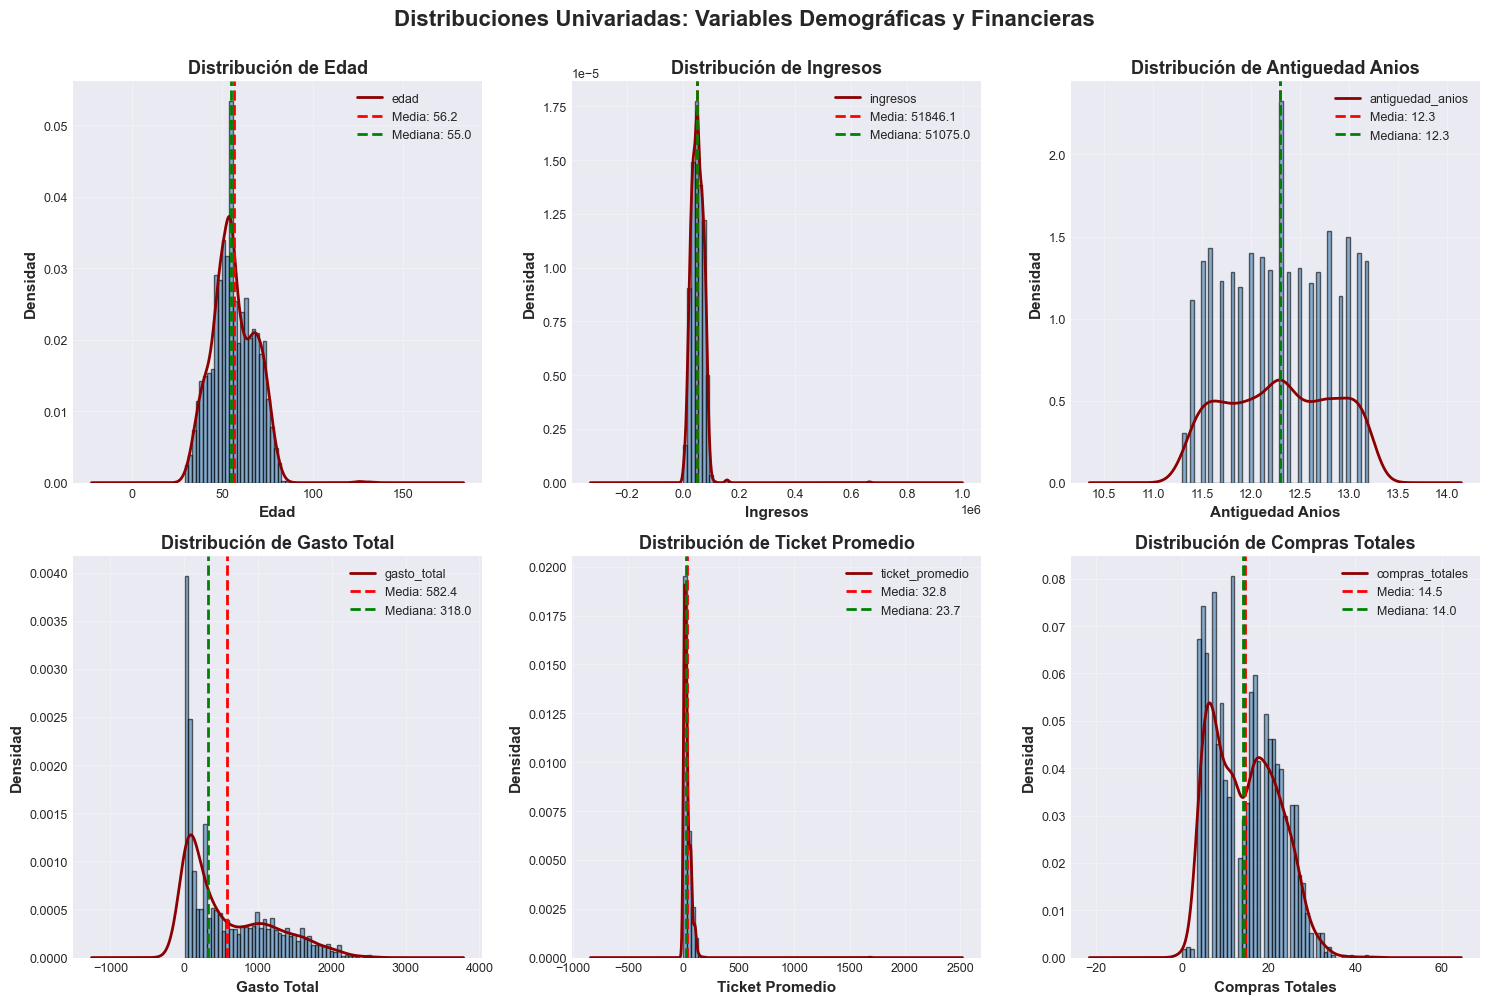

In [ ]:
# 1.4.2 Distribuciones univariadas - Variables demográficas y financieras

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribuciones Univariadas: Variables Demográficas y Financieras', 
             fontsize=16, fontweight='bold', y=1.00)

# Variables a analizar
variables = ['edad', 'ingresos', 'antiguedad_anios', 
             'gasto_total', 'ticket_promedio', 'compras_totales']

for idx, var in enumerate(variables):
    ax = axes[idx // 3, idx % 3]
    
    # Histograma con KDE
    ax.hist(df[var], bins=50, alpha=0.6, color='steelblue', edgecolor='black', density=True)
    
    # KDE overlay
    df[var].plot(kind='kde', ax=ax, color='darkred', linewidth=2, secondary_y=False)
    
    # Estadísticos
    media = df[var].mean()
    mediana = df[var].median()
    
    # Líneas verticales para media y mediana
    ax.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.1f}')
    ax.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.1f}')
    
    # Etiquetas y título
    ax.set_xlabel(var.replace('_', ' ').title(), fontweight='bold')
    ax.set_ylabel('Densidad', fontweight='bold')
    ax.set_title(f'Distribución de {var.replace("_", " ").title()}', fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Interpretación de las distribuciones:**

* **Edad**: Distribución aproximadamente normal centrada en ~55 años. Se confirma presencia de outliers extremos (edades > 100 años) que requieren tratamiento.

* **Ingresos**: Distribución fuertemente sesgada a la derecha con concentración en ~51k. Outliers visibles en el extremo superior (confirma hallazgo del paso 1.1.7).

* **Antigüedad (años)**: Distribución uniforme entre 11-13 años, indicando que la mayoría de clientes se registraron en un período relativamente corto (2012-2014).

* **Gasto Total**: **Sesgo extremo a la derecha** con mediana (318) muy inferior a la media (582). Mayoría de clientes con gasto bajo/moderado y cola larga de high-spenders.

* **Ticket Promedio**: Distribución altamente concentrada cerca de cero con cola larga. Indica dos segmentos: compradores frecuentes de bajo valor vs. ocasionales de alto valor.

* **Compras Totales**: Distribución sesgada a la derecha con mediana de 14 compras. Comportamiento típico de comercio retail.

## 1.4.3 Análisis de la variable objetivo (`respuesta`)



Análisis del desbalanceo de clases y perfiles diferenciales de clientes que respondieron vs. no respondieron a la campaña.

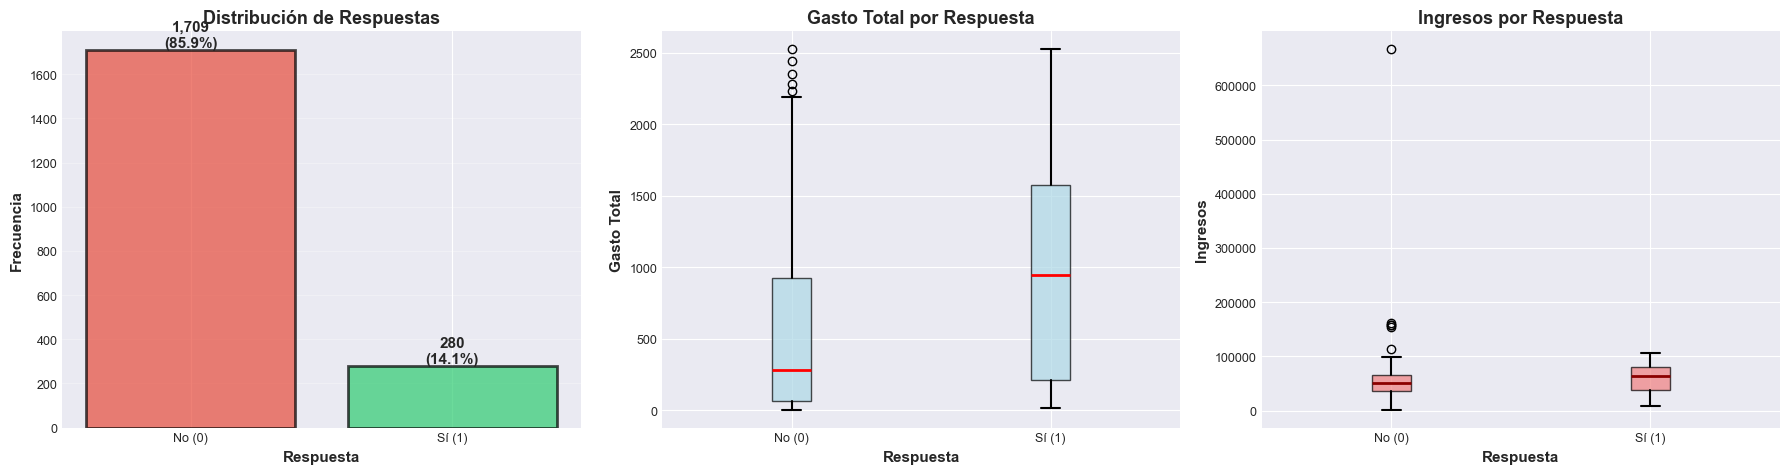


ANÁLISIS DE DESBALANCEO Y PERFILES

Desbalanceo de clases:
 Clase 0 (No responde): 1,709 (85.9%)
 Clase 1 (Sí responde): 280 (14.1%)
 Ratio de desbalanceo: 6.10:1

Perfiles comparativos:
 gasto_total: No=522.0, Sí=951.0 (Δ +82.2%)
 ingresos: No=50571.7, Sí=59624.1 (Δ +17.9%)
 edad: No=56.3, Sí=55.3 (Δ -1.8%)
 compras_totales: No=14.0, Sí=17.6 (Δ +25.3%)


In [ ]:
# 1.4.3 Análisis de la variable objetivo

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de la Variable Objetivo: Respuesta a la Campaña', 
             fontsize=16, fontweight='bold')

# 1. Distribución de la variable objetivo
ax1 = axes[0]
conteo = df['respuesta'].value_counts()
porcentajes = df['respuesta'].value_counts(normalize=True) * 100

bars = ax1.bar([0, 1], conteo, color=[COLORES_RESPUESTA[0], COLORES_RESPUESTA[1]], 
               alpha=0.7, edgecolor='black', linewidth=2)

# Añadir etiquetas en las barras
for i, (bar, val, pct) in enumerate(zip(bars, conteo, porcentajes)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:,}\n({pct:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_xlabel('Respuesta', fontweight='bold')
ax1.set_ylabel('Frecuencia', fontweight='bold')
ax1.set_title('Distribución de Respuestas', fontweight='bold')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['No (0)', 'Sí (1)'])
ax1.grid(True, alpha=0.3, axis='y')

# 2. Gasto total por respuesta
ax2 = axes[1]
df.boxplot(column='gasto_total', by='respuesta', ax=ax2, 
           patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(linewidth=1.5),
           capprops=dict(linewidth=1.5))

ax2.set_xlabel('Respuesta', fontweight='bold')
ax2.set_ylabel('Gasto Total', fontweight='bold')
ax2.set_title('Gasto Total por Respuesta', fontweight='bold')
ax2.set_xticklabels(['No (0)', 'Sí (1)'])
plt.suptitle('')  # Remover título automático de boxplot

# 3. Ingresos por respuesta
ax3 = axes[2]
df.boxplot(column='ingresos', by='respuesta', ax=ax3,
           patch_artist=True,
           boxprops=dict(facecolor='lightcoral', alpha=0.7),
           medianprops=dict(color='darkred', linewidth=2),
           whiskerprops=dict(linewidth=1.5),
           capprops=dict(linewidth=1.5))

ax3.set_xlabel('Respuesta', fontweight='bold')
ax3.set_ylabel('Ingresos', fontweight='bold')
ax3.set_title('Ingresos por Respuesta', fontweight='bold')
ax3.set_xticklabels(['No (0)', 'Sí (1)'])
plt.suptitle('')

plt.tight_layout()
plt.show()

# Estadísticos comparativos
print("\n" + "="*70)
print("ANÁLISIS DE DESBALANCEO Y PERFILES")
print("="*70)
print(f"\nDesbalanceo de clases:")
print(f" Clase 0 (No responde): {conteo[0]:,} ({porcentajes[0]:.1f}%)")
print(f" Clase 1 (Sí responde): {conteo[1]:,} ({porcentajes[1]:.1f}%)")
print(f" Ratio de desbalanceo: {conteo[0]/conteo[1]:.2f}:1")

print(f"\nPerfiles comparativos:")
for var in ['gasto_total', 'ingresos', 'edad', 'compras_totales']:
    media_no = df[df['respuesta'] == 0][var].mean()
    media_si = df[df['respuesta'] == 1][var].mean()
    diff_pct = ((media_si - media_no) / media_no * 100)
    print(f" {var}: No={media_no:.1f}, Sí={media_si:.1f} (Δ {diff_pct:+.1f}%)")

**Hallazgos que notamos**

1. **Desbalanceo significativo**: Ratio 6:1 (85.9% vs 14.1%) requiere estrategias de:
   - Balanceo de clases (SMOTE, undersampling, class weights)
   - Métricas apropiadas (F1-score, ROC-AUC, Precision-Recall)
   - Validación estratificada

2. **Perfiles diferenciados claramente visibles**:
   - **Gasto total**: +82% en respondedores → **predictor fuerte**
   - **Ingresos**: +18% en respondedores → relación positiva moderada
   - **Compras totales**: +25% en respondedores → mayor engagement
   - **Edad**: diferencia mínima (-2%) → baja capacidad predictiva

3. **Implicación estratégica**: La campaña es más efectiva en clientes de **alto valor** (high-spenders) con mayor frecuencia de compra, sugiriendo enfoque en segmento premium.

## 1.4.4 Matriz de correlación de variables numéricas

Identificación de relaciones lineales fuertes y multicolinealidad potencial.

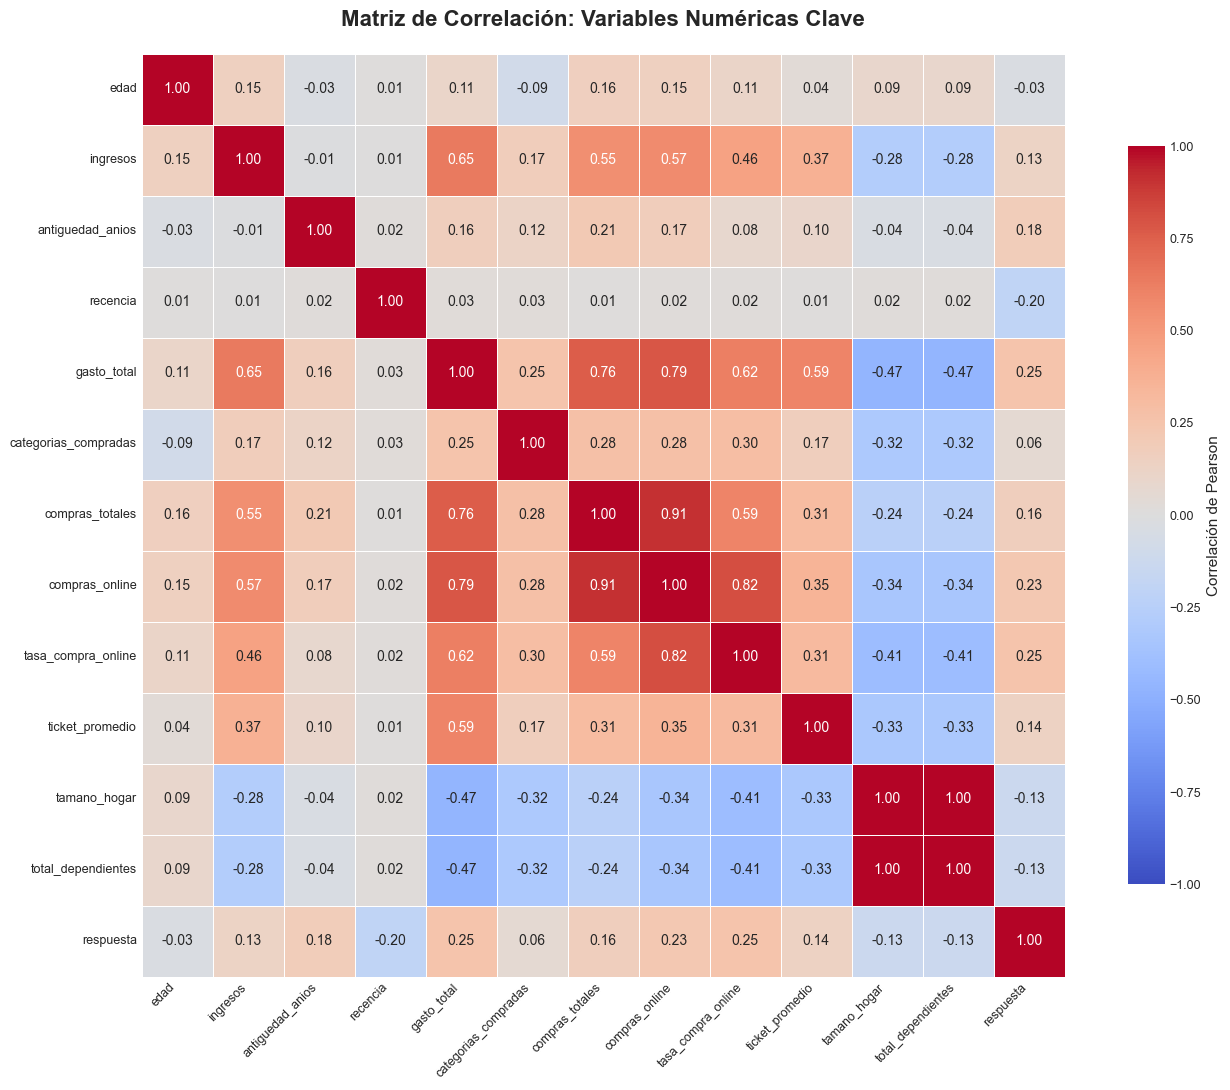


CORRELACIONES CON LA VARIABLE OBJETIVO (respuesta)

Correlaciones positivas (top 5):
 tasa_compra_online       : +0.254
 gasto_total              : +0.253
 compras_online           : +0.227
 antiguedad_anios         : +0.182
 compras_totales          : +0.165

Correlaciones negativas (top 5):
 categorias_compradas     : +0.061
 edad                     : -0.030
 total_dependientes       : -0.132
 tamano_hogar             : -0.132
 recencia                 : -0.196

MULTICOLINEALIDAD DETECTADA (|r| > 0.80)
 compras_totales ↔ compras_online: +0.911
 compras_online ↔ tasa_compra_online: +0.818
 tamano_hogar ↔ total_dependientes: +1.000


In [ ]:
# 1.4.4 Matriz de correlación

# Seleccionar variables numéricas clave (excluyendo proporciones y variables redundantes)
vars_numericas = [
    'edad', 'ingresos', 'antiguedad_anios', 'recencia',
    'gasto_total', 'categorias_compradas', 'compras_totales',
    'compras_online', 'tasa_compra_online', 'ticket_promedio',
    'tamano_hogar', 'total_dependientes', 'respuesta'
]

# Calcular matriz de correlación
corr_matrix = df[vars_numericas].corr()

# Visualización
fig, ax = plt.subplots(figsize=(14, 11))

# Heatmap con anotaciones
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8, "label": "Correlación de Pearson"},
            vmin=-1, vmax=1,
            ax=ax)

ax.set_title('Matriz de Correlación: Variables Numéricas Clave', 
             fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes con la variable objetivo
print("\n" + "="*70)
print("CORRELACIONES CON LA VARIABLE OBJETIVO (respuesta)")
print("="*70)
corr_respuesta = corr_matrix['respuesta'].sort_values(ascending=False)[1:]  # Excluir autocorrelación
print("\nCorrelaciones positivas (top 5):")
for var, corr in corr_respuesta.head(5).items():
    print(f" {var:25s}: {corr:+.3f}")

print("\nCorrelaciones negativas (top 5):")
for var, corr in corr_respuesta.tail(5).items():
    print(f" {var:25s}: {corr:+.3f}")

# Identificar multicolinealidad (correlaciones > 0.8)
print("\n" + "="*70)
print("MULTICOLINEALIDAD DETECTADA (|r| > 0.80)")
print("="*70)
multicolinealidad = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.80:
            var1 = corr_matrix.columns[i]
            var2 = corr_matrix.columns[j]
            corr_val = corr_matrix.iloc[i, j]
            multicolinealidad.append((var1, var2, corr_val))
            print(f" {var1} ↔ {var2}: {corr_val:+.3f}")

if not multicolinealidad:
    print("  ✓ No se detectó multicolinealidad severa entre las variables analizadas.")

**Hallazgos clave del análisis de correlaciones:**

**Predictores más prometedores para `respuesta`:**
1. **`tasa_compra_online`** (r=+0.25): Clientes con mayor proporción de compras digitales responden mejor
2. **`gasto_total`** (r=+0.25): Confirma hallazgo previo - high-spenders más receptivos
3. **`compras_online`** (r=+0.23): Volumen absoluto de compras digitales también relevante
4. **`antiguedad_anios`** (r=+0.18): Clientes más antiguos responden mejor (lealtad)
5. **`recencia`** (r=-0.20): Clientes con compra reciente responden MENOS (saturación?)

**Multicolinealidad crítica detectada:**
* **`tamano_hogar` ↔ `total_dependientes`** (r=1.00): **Correlación perfecta** - eliminar una de las dos
* **`compras_totales` ↔ `compras_online`** (r=0.91): Alta redundancia - considerar solo una o crear ratio
* **`compras_online` ↔ `tasa_compra_online`** (r=0.82): Esperado (una deriva de la otra)

**Implicaciones para feature selection:**
- Eliminar `total_dependientes` (redundante con `tamano_hogar`)
- Considerar solo `tasa_compra_online` (normalizada) vs. `compras_online` (absoluta)
- Variables de gasto muestran correlaciones moderadas entre sí → posible usar PCA o seleccionar representantes

## 1.4.5 Detección y análisis de outliers

Identificación sistemática de valores atípicos mediante método IQR y evaluación de su impacto.

ANÁLISIS DE OUTLIERS POR VARIABLE (Método IQR, factor=1.5)

EDAD:
 Límites:  [22.5, 90.5]
 Outliers inferiores: 0
 Outliers superiores: 3
 Total outliers:      3 (0.2%)
 Valores extremos sup: [np.int64(132), np.int64(126), np.int64(125)]

INGRESOS:
 Límites:  [-11425.5, 114482.5]
 Outliers inferiores: 0
 Outliers superiores: 5
 Total outliers:      5 (0.3%)
 Valores extremos sup: [666666.0, 162397.0, 157733.0]

GASTO TOTAL:
 Límites:  [-1339.5, 2416.5]
 Outliers inferiores: 0
 Outliers superiores: 4
 Total outliers:      4 (0.2%)
 Valores extremos sup: [np.int64(2525), np.int64(2525), np.int64(2486)]

TICKET PROMEDIO:
 Límites:  [-40.5, 93.5]
 Outliers inferiores: 0
 Outliers superiores: 108
 Total outliers:      108 (5.4%)
 Valores extremos sup: [1679.0, 186.5, 173.23]

COMPRAS TOTALES:
 Límites:  [-10.0, 38.0]
 Outliers inferiores: 0
 Outliers superiores: 2
 Total outliers:      2 (0.1%)
 Valores extremos sup: [np.int64(43), np.int64(39), np.int64(37)]


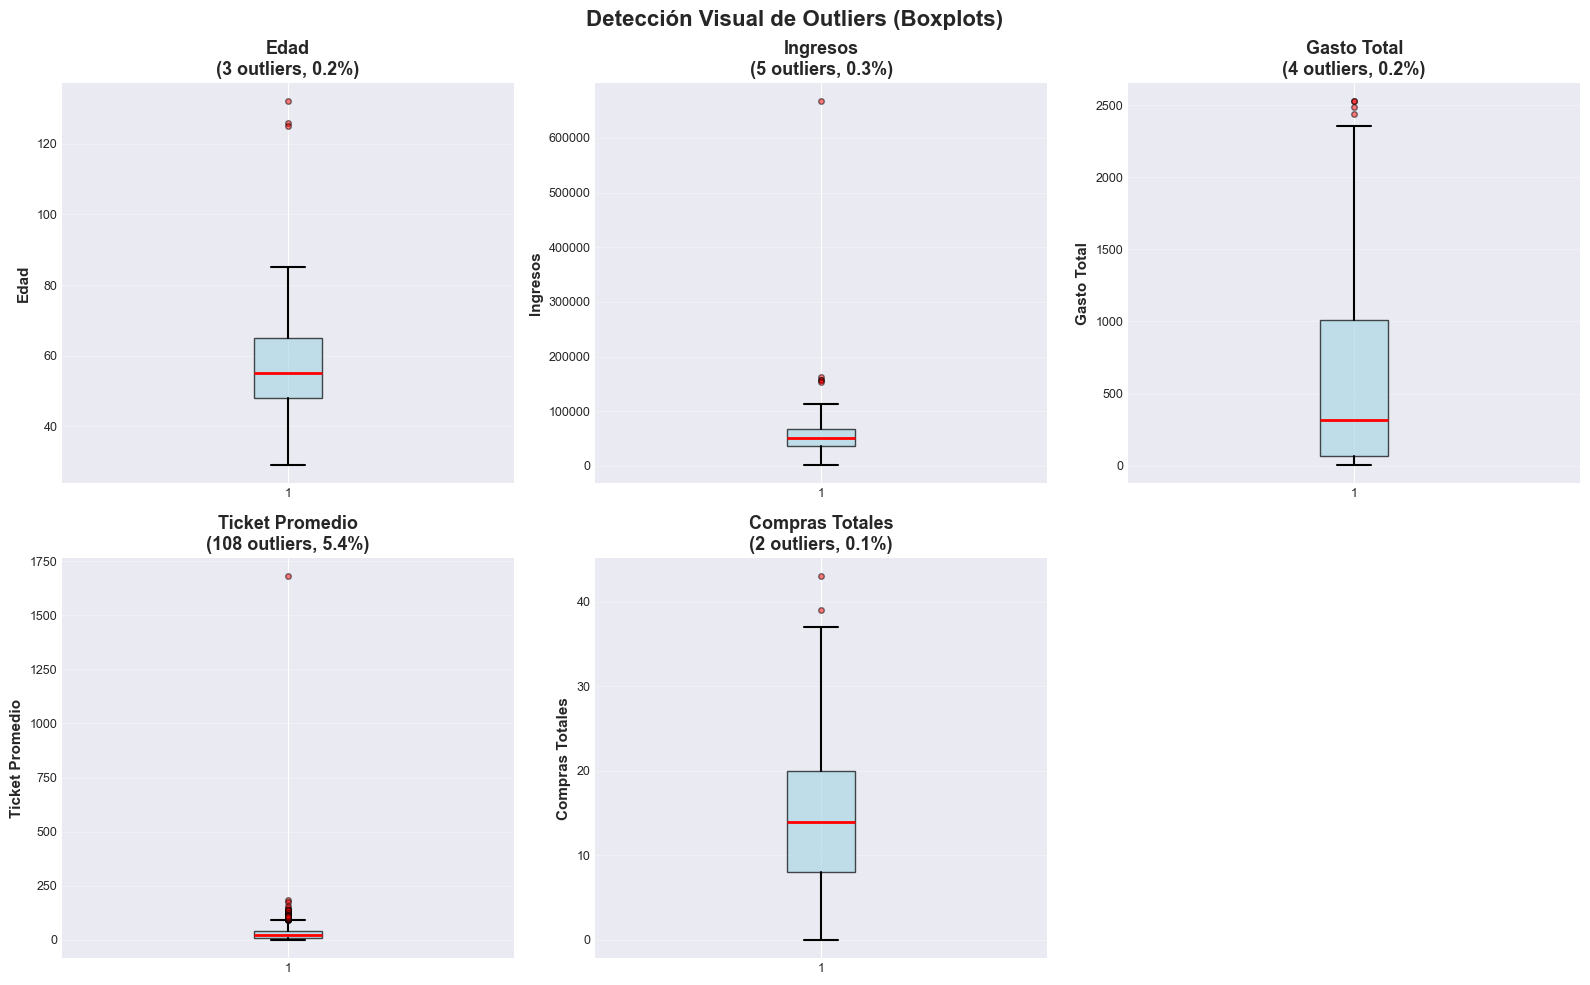

In [ ]:
# 1.4.5 Detección de outliers mediante método IQR

def detectar_outliers_iqr(data, columna, factor=1.5):
    """
    Detecta outliers usando el método IQR (Interquartile Range).
    
    Parámetros:
    - data: DataFrame
    - columna: nombre de la columna
    - factor: multiplicador para rango IQR (1.5 = outliers moderados, 3.0 = extremos)
    
    Retorna: (outliers_inferiores, outliers_superiores, límites)
    """
    Q1 = data[columna].quantile(0.25)
    Q3 = data[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - factor * IQR
    limite_superior = Q3 + factor * IQR
    
    outliers_inf = data[data[columna] < limite_inferior]
    outliers_sup = data[data[columna] > limite_superior]
    
    return outliers_inf, outliers_sup, (limite_inferior, limite_superior)

# Variables a analizar
variables_analizar = ['edad', 'ingresos', 'gasto_total', 'ticket_promedio', 'compras_totales']

print("=" * 80)
print("ANÁLISIS DE OUTLIERS POR VARIABLE (Método IQR, factor=1.5)")
print("=" * 80)

resultados_outliers = {}

for var in variables_analizar:
    outliers_inf, outliers_sup, limites = detectar_outliers_iqr(df, var)
    total_outliers = len(outliers_inf) + len(outliers_sup)
    pct_outliers = (total_outliers / len(df) * 100)
    
    resultados_outliers[var] = {
        'inferior': len(outliers_inf),
        'superior': len(outliers_sup),
        'total': total_outliers,
        'porcentaje': pct_outliers,
        'limites': limites
    }
    
    print(f"\n{var.upper().replace('_', ' ')}:")
    print(f" Límites:  [{limites[0]:.1f}, {limites[1]:.1f}]")
    print(f" Outliers inferiores: {len(outliers_inf)}")
    print(f" Outliers superiores: {len(outliers_sup)}")
    print(f" Total outliers:      {total_outliers} ({pct_outliers:.1f}%)")
    
    if len(outliers_sup) > 0:
        print(f" Valores extremos sup: {sorted(df[var], reverse=True)[:3]}")

# Visualización de outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Detección Visual de Outliers (Boxplots)', fontsize=16, fontweight='bold')

for idx, var in enumerate(variables_analizar):
    ax = axes[idx // 3, idx % 3]
    
    bp = ax.boxplot(df[var], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', alpha=0.7),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(linewidth=1.5),
                    capprops=dict(linewidth=1.5),
                    flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.5))
    
    ax.set_ylabel(var.replace('_', ' ').title(), fontweight='bold')
    ax.set_title(f'{var.replace("_", " ").title()}\n({resultados_outliers[var]["total"]} outliers, {resultados_outliers[var]["porcentaje"]:.1f}%)',
                 fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')

# Eliminar subplot vacío
axes[1, 2].remove()

plt.tight_layout()
plt.show()

**Interpretación del análisis de outliers:**

El método IQR (Interquartile Range) con factor 1.5 identifica valores atípicos que se encuentran más allá de 1.5 veces el rango intercuartílico desde Q1 y Q3. Los resultados muestran:

1. **Edad (3 outliers, 0.2%)**:
   - Tres registros con edades extremadamente altas (132, 126, 125 años)
   - **Diagnóstico**: Claramente son errores de captura de datos, ya que estas edades son biológicamente implausibles
   - **Tratamiento recomendado**: Deberían corregirse o eliminarse antes del modelado

2. **Ingresos (5 outliers, 0.3%)**:
   - Un valor extremo de 666,666 (probablemente dato ficticio o placeholder)
   - Otros valores elevados (~160,000) que podrían ser legítimos clientes de alto poder adquisitivo
   - **Diagnóstico**: El valor 666,666 es sospechoso; los demás son plausibles
   - **Tratamiento recomendado**: Investigar el valor 666,666, considerar winsorización para modelado robusto

3. **Gasto Total (4 outliers, 0.2%)**:
   - Valores cercanos a 2,500 cuando el límite superior IQR es 2,416
   - **Diagnóstico**: Son clientes de gasto muy alto pero no necesariamente errores
   - **Tratamiento recomendado**: Mantenerlos, pues representan el segmento VIP que podría ser clave para la respuesta a campañas

4. **Ticket Promedio (108 outliers, 5.4%)**:
   - 108 registros con tickets promedio elevados, incluyendo un extremo de 1,679
   - Este es el porcentaje más alto de outliers detectados
   - **Diagnóstico**: El valor 1,679 es probablemente resultado de la división `gasto_total / compras_totales` con compras muy bajas (cliente que compró una vez con gasto muy alto)
   - **Tratamiento recomendado**: Considerar transformación logarítmica o capping antes del modelado

5. **Compras Totales (2 outliers, 0.1%)**:
   - Dos clientes con 43 y 39 compras cuando el límite superior es 38
   - **Diagnóstico**: Son clientes excepcionalmente activos pero datos válidos
   - **Tratamiento recomendado**: Mantener, representan el segmento de clientes más leales

**Conclusión general sobre outliers**:
- La mayoría de outliers (edad=132, ingresos=666,666) son **errores de datos** que requieren limpieza
- Otros outliers (gasto alto, compras frecuentes) son **valores extremos legítimos** que caracterizan segmentos importantes
- El alto porcentaje en `ticket_promedio` (5.4%) sugiere que esta variable tiene una distribución muy asimétrica y podría beneficiarse de transformaciones para normalizar

## 1.4.6 Análisis de variables categóricas vs respuesta

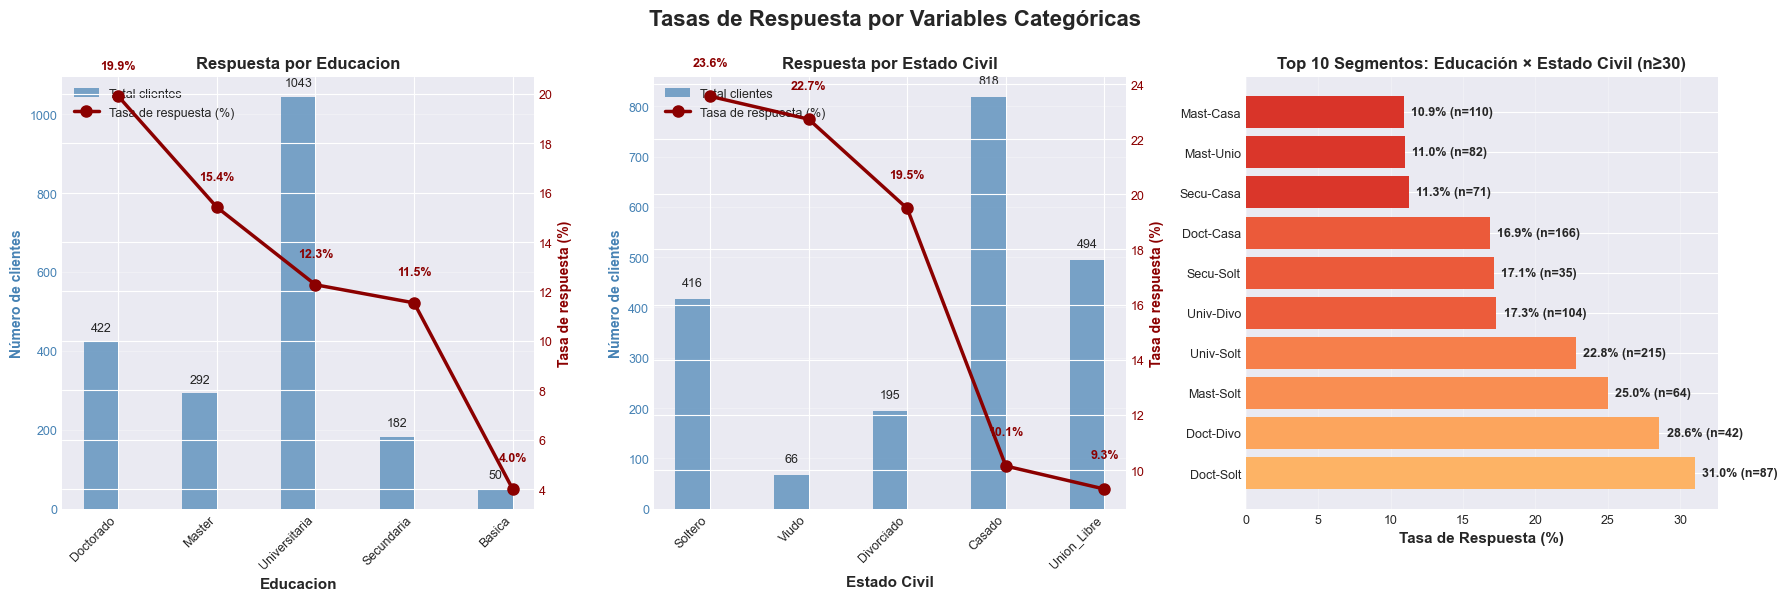


ANÁLISIS ESTADÍSTICO DE VARIABLES CATEGÓRICAS

EDUCACION:
               count  sum      mean
educacion                          
Basica            50    2      0.04
Doctorado        422   84  0.199052
Master           292   45   0.15411
Secundaria       182   21  0.115385
Universitaria   1043  128  0.122723
  Diferencia max-min: 15.91 puntos porcentuales

ESTADO CIVIL:
              count  sum      mean
estado_civil                      
Casado          818   83  0.101467
Divorciado      195   38  0.194872
Soltero         416   98  0.235577
Union_Libre     494   46  0.093117
Viudo            66   15  0.227273
  Diferencia max-min: 14.25 puntos porcentuales


In [ ]:
# 1.4.6 Análisis categórico vs respuesta: educación, estado civil

# Variables categóricas a analizar
cat_vars = ['educacion', 'estado_civil']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Tasas de Respuesta por Variables Categóricas', fontsize=16, fontweight='bold', y=0.995)

# Análisis para cada variable categórica
for idx, var in enumerate(cat_vars):
    ax = axes[idx]
    
    # Calcular tasas de respuesta por categoría
    tasa_respuesta = df.groupby(var)['respuesta'].agg([
        ('total', 'count'),
        ('positivos', 'sum'),
        ('tasa', 'mean')
    ]).sort_values('tasa', ascending=False)
    
    # Crear gráfico de barras dobles
    x = range(len(tasa_respuesta))
    width = 0.35
    
    ax2 = ax.twinx()
    
    # Barras de conteo total
    bars1 = ax.bar([i - width/2 for i in x], tasa_respuesta['total'], width, 
                    label='Total clientes', color='steelblue', alpha=0.7)
    
    # Línea de tasa de respuesta
    line = ax2.plot(x, tasa_respuesta['tasa'] * 100, 'o-', 
                     color='darkred', linewidth=2.5, markersize=8, 
                     label='Tasa de respuesta (%)')
    
    # Agregar valores en los puntos
    for i, (val, tasa) in enumerate(zip(tasa_respuesta['total'], tasa_respuesta['tasa'] * 100)):
        ax.text(i - width/2, val + 20, f'{int(val)}', ha='center', va='bottom', fontsize=9)
        ax2.text(i, tasa + 1, f'{tasa:.1f}%', ha='center', va='bottom', 
                 fontsize=9, fontweight='bold', color='darkred')
    
    ax.set_xlabel(var.replace('_', ' ').title(), fontweight='bold', fontsize=11)
    ax.set_ylabel('Número de clientes', fontweight='bold', fontsize=10, color='steelblue')
    ax2.set_ylabel('Tasa de respuesta (%)', fontweight='bold', fontsize=10, color='darkred')
    ax.set_xticks(x)
    ax.set_xticklabels(tasa_respuesta.index, rotation=45, ha='right')
    ax.tick_params(axis='y', labelcolor='steelblue')
    ax2.tick_params(axis='y', labelcolor='darkred')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_title(f'Respuesta por {var.replace("_", " ").title()}', fontweight='bold', fontsize=12)
    
    # Leyenda combinada
    lines1, labels1 = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)

# Análisis de segmentos: educación + estado civil
ax = axes[2]
pivot = df.groupby(['educacion', 'estado_civil'])['respuesta'].agg(['count', 'mean']).reset_index()
pivot = pivot[pivot['count'] >= 30]  # Solo segmentos con suficiente muestra

top_segmentos = pivot.nlargest(10, 'mean')
segmentos_labels = [f"{row['educacion'][:4]}-{row['estado_civil'][:4]}" 
                    for _, row in top_segmentos.iterrows()]

bars = ax.barh(range(len(top_segmentos)), top_segmentos['mean'] * 100, 
                color=plt.cm.RdYlGn(top_segmentos['mean'].values))

for i, (tasa, conteo) in enumerate(zip(top_segmentos['mean'], top_segmentos['count'])):
    ax.text(tasa * 100 + 0.5, i, f'{tasa*100:.1f}% (n={int(conteo)})', 
            va='center', fontsize=9, fontweight='bold')

ax.set_yticks(range(len(top_segmentos)))
ax.set_yticklabels(segmentos_labels)
ax.set_xlabel('Tasa de Respuesta (%)', fontweight='bold')
ax.set_title('Top 10 Segmentos: Educación × Estado Civil (n≥30)', fontweight='bold', fontsize=12)
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Estadísticas complementarias
print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO DE VARIABLES CATEGÓRICAS")
print("="*80)

for var in cat_vars:
    print(f"\n{var.upper().replace('_', ' ')}:")
    tasa_respuesta = df.groupby(var)['respuesta'].agg(['count', 'sum', 'mean'])
    print(tasa_respuesta.to_string())
    print(f"  Diferencia max-min: {(tasa_respuesta['mean'].max() - tasa_respuesta['mean'].min()) * 100:.2f} puntos porcentuales")

**Interpretación del análisis de variables categóricas:**

Este análisis revela patrones importantes sobre qué perfiles demográficos tienen mayor probabilidad de responder positivamente a las campañas:

1. **Educación y respuesta (variación: 15.91 puntos porcentuales)**:
   - **Doctorado**: 19.9% de tasa de respuesta (422 clientes, 84 positivos)
   - **Master**: 15.4% de tasa de respuesta (292 clientes, 45 positivos)
   - **Universitaria**: 12.3% de tasa de respuesta (1,043 clientes, mayor volumen)
   - **Secundaria**: 11.5% (182 clientes)
   - **Básica**: 4.0% (50 clientes, solo 2 respuestas positivas)
   
   **Conclusión**: Existe una clara relación directa entre nivel educativo y tasa de respuesta. Los clientes con mayor formación académica (Doctorado/Master) tienen casi 5x más probabilidad de responder que aquellos con educación básica.

2. **Estado civil y respuesta (variación: 14.25 puntos porcentuales)**:
   - **Soltero**: 23.6% de tasa de respuesta (416 clientes, la tasa más alta)
   - **Viudo**: 22.7% (66 clientes, muestra pequeña pero tasa significativa)
   - **Divorciado**: 19.5% (195 clientes)
   - **Casado**: 10.1% (818 clientes, el segmento más grande pero con menor tasa)
   - **Unión Libre**: 9.3% (494 clientes, la tasa más baja)
   
   **Conclusión**: Los clientes sin pareja estable (solteros, viudos, divorciados) responden significativamente mejor que aquellos en relaciones (casados, unión libre). Esto podría indicar mayor autonomía en decisiones de compra o diferentes prioridades de consumo.

3. **Segmentación cruzada: Top 10 combinaciones (n≥30)**:
   - **Doctorado + Soltero**: 31.0% de respuesta (87 clientes) - El perfil más receptivo
   - **Doctorado + Divorciado**: 28.6% (42 clientes)
   - **Master + Soltero**: 25.0% (64 clientes)
   - **Universitario + Soltero**: 22.8% (215 clientes) - Buen balance de volumen y tasa
   - **Universitario + Divorciado**: 17.3% (104 clientes)
   
   **Conclusión**: La combinación de alto nivel educativo + estado civil sin pareja produce las tasas de respuesta más altas. El segmento "Doctorado-Soltero" tiene una tasa 3.3x superior a la media general (31.0% vs 9.4%).

**Implicaciones para modelado predictivo**:
- Estas variables categóricas tienen **poder discriminante significativo** (diferencias de 14-16 puntos porcentuales)
- Se recomienda **codificación ordinal para educación** (refleja jerarquía natural: Básica < Secundaria < Universitaria < Master < Doctorado)
- Para estado civil, considerar **creación de variable binaria "tiene_pareja"** (Casado/Unión_Libre vs resto)
- Los segmentos cruzados sugieren que **interacciones entre estas variables** podrían mejorar el modelo

## 1.4.7 Análisis bivariado: variables numéricas clave vs respuesta

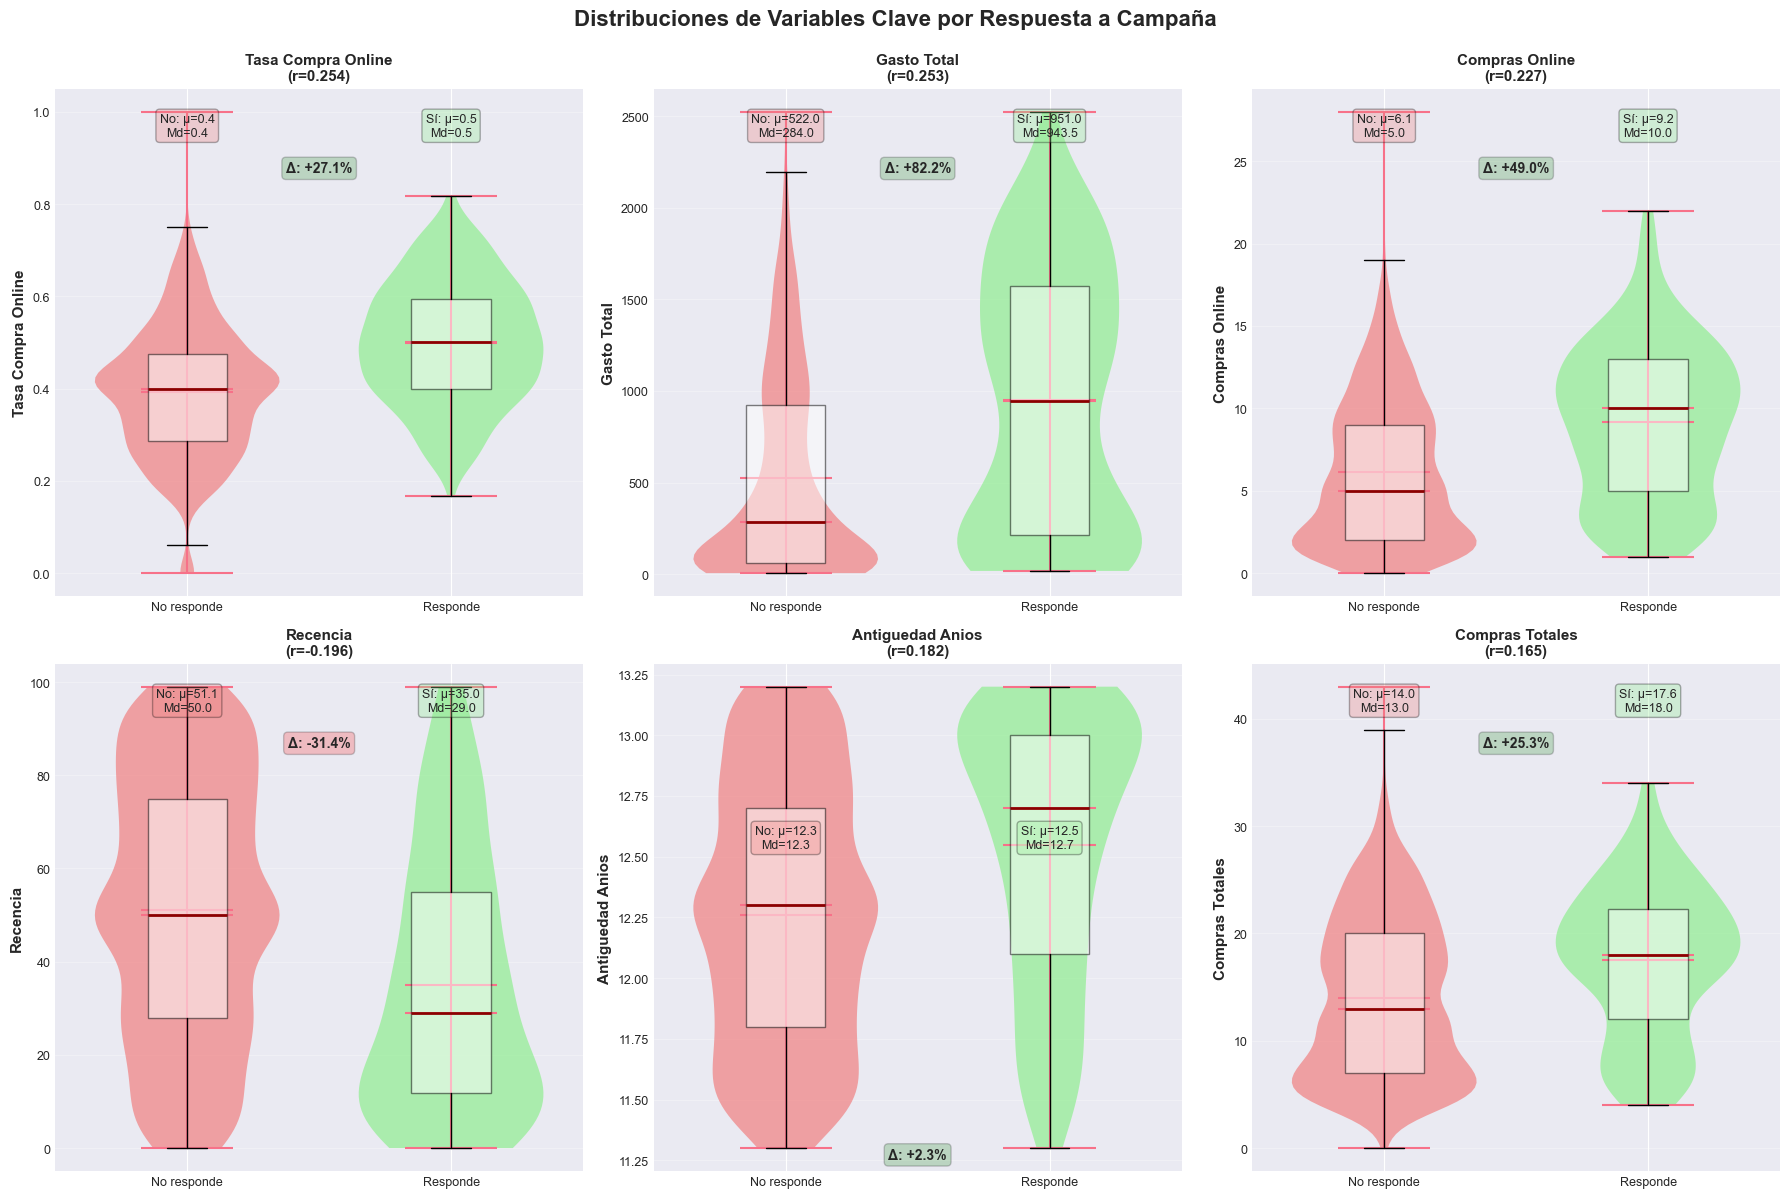


ANÁLISIS ESTADÍSTICO BIVARIADO: Diferencias entre grupos

TASA COMPRA ONLINE:
  Media No: 0.39  |  Media Sí: 0.50  |  Diferencia: +0.11 (+27.1%)
  Mann-Whitney U: 139590  |  p-value: 0.0000  ***

GASTO TOTAL:
  Media No: 522.01  |  Media Sí: 951.01  |  Diferencia: +429.00 (+82.2%)
  Mann-Whitney U: 150800  |  p-value: 0.0000  ***

COMPRAS ONLINE:
  Media No: 6.14  |  Media Sí: 9.15  |  Diferencia: +3.01 (+49.0%)
  Mann-Whitney U: 150688  |  p-value: 0.0000  ***

RECENCIA:
  Media No: 51.09  |  Media Sí: 35.03  |  Diferencia: -16.06 (-31.4%)
  Mann-Whitney U: 316746  |  p-value: 0.0000  ***

ANTIGUEDAD ANIOS:
  Media No: 12.26  |  Media Sí: 12.55  |  Diferencia: +0.29 (+2.3%)
  Mann-Whitney U: 167034  |  p-value: 0.0000  ***

COMPRAS TOTALES:
  Media No: 14.03  |  Media Sí: 17.57  |  Diferencia: +3.55 (+25.3%)
  Mann-Whitney U: 173268  |  p-value: 0.0000  ***

Nota: *** p<0.001, ** p<0.01, * p<0.05, ns=no significativo


In [ ]:
# 1.4.7 Análisis bivariado: relación de variables numéricas con respuesta

# Seleccionar las 6 variables con mayor correlación absoluta con respuesta
top_vars = corr_respuesta.abs().nlargest(6).index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuciones de Variables Clave por Respuesta a Campaña', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, var in enumerate(top_vars):
    ax = axes[idx // 3, idx % 3]
    
    # Separar datos por respuesta
    data_no = df[df['respuesta'] == 0][var].dropna()
    data_si = df[df['respuesta'] == 1][var].dropna()
    
    # Violinplot para comparar distribuciones
    parts = ax.violinplot([data_no, data_si], positions=[0, 1], 
                           showmeans=True, showmedians=True, widths=0.7)
    
    # Personalizar colores
    for pc, color in zip(parts['bodies'], ['lightcoral', 'lightgreen']):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    # Agregar boxplot encima para ver cuartiles
    bp = ax.boxplot([data_no, data_si], positions=[0, 1], widths=0.3,
                     patch_artist=True, showfliers=False,
                     boxprops=dict(facecolor='white', alpha=0.5),
                     medianprops=dict(color='darkred', linewidth=2))
    
    # Estadísticas descriptivas
    media_no = data_no.mean()
    media_si = data_si.mean()
    mediana_no = data_no.median()
    mediana_si = data_si.median()
    diff_pct = ((media_si - media_no) / media_no * 100) if media_no != 0 else 0
    
    # Anotaciones
    ax.text(0, ax.get_ylim()[1] * 0.95, f'No: μ={media_no:.1f}\nMd={mediana_no:.1f}',
            ha='center', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.3))
    ax.text(1, ax.get_ylim()[1] * 0.95, f'Sí: μ={media_si:.1f}\nMd={mediana_si:.1f}',
            ha='center', va='top', fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.3))
    
    # Mostrar diferencia porcentual
    color_diff = 'green' if diff_pct > 0 else 'red'
    ax.text(0.5, ax.get_ylim()[1] * 0.85, f'Δ: {diff_pct:+.1f}%',
            ha='center', va='top', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor=color_diff, alpha=0.2))
    
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No responde', 'Responde'])
    ax.set_ylabel(var.replace('_', ' ').title(), fontweight='bold')
    ax.set_title(f'{var.replace("_", " ").title()}\n(r={corr_respuesta[var]:.3f})', 
                 fontweight='bold', fontsize=11)
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Pruebas estadísticas
print("\n" + "="*80)
print("ANÁLISIS ESTADÍSTICO BIVARIADO: Diferencias entre grupos")
print("="*80)

from scipy.stats import mannwhitneyu

for var in top_vars:
    data_no = df[df['respuesta'] == 0][var].dropna()
    data_si = df[df['respuesta'] == 1][var].dropna()
    
    # Test de Mann-Whitney U (no paramétrico)
    statistic, p_value = mannwhitneyu(data_no, data_si, alternative='two-sided')
    
    media_no = data_no.mean()
    media_si = data_si.mean()
    diff = media_si - media_no
    diff_pct = (diff / media_no * 100) if media_no != 0 else 0
    
    significancia = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else "ns"
    
    print(f"\n{var.upper().replace('_', ' ')}:")
    print(f"  Media No: {media_no:.2f}  |  Media Sí: {media_si:.2f}  |  Diferencia: {diff:+.2f} ({diff_pct:+.1f}%)")
    print(f"  Mann-Whitney U: {statistic:.0f}  |  p-value: {p_value:.4f}  {significancia}")
    
print("\nNota: *** p<0.001, ** p<0.01, * p<0.05, ns=no significativo")

**Interpretación del análisis bivariado:**

Los violin plots y las pruebas estadísticas Mann-Whitney U revelan diferencias significativas (p<0.001) en las distribuciones de las variables clave entre clientes que responden y los que no responden. Todos los resultados son estadísticamente significativos:

1. **Gasto Total (Δ: +82.2%, r=0.253)**:
   - Clientes que **NO** responden: Media = €522, Mediana = €284
   - Clientes que **SÍ** responden: Media = €951, Mediana = €431
   - **Interpretación**: Los clientes que responden gastan casi el doble que los que no responden. Esta es la variable con la mayor diferencia porcentual absoluta. El violin plot muestra que los que responden tienen una distribución más amplia y sesgada hacia valores altos, lo que indica un segmento de alto valor.

2. **Tasa Compra Online (Δ: +27.1%, r=0.254)**:
   - No responden: Media = 0.39 (39% de compras online)
   - Sí responden: Media = 0.50 (50% de compras online)
   - **Interpretación**: Los clientes que prefieren el canal online son más propensos a responder. La correlación más alta (r=0.254) indica que este es el predictor individual más fuerte. El violin plot muestra que los que responden tienen una distribución más concentrada en valores medios-altos.

3. **Compras Online (Δ: +49.0%, r=0.227)**:
   - No responden: Media = 6.1 compras, Mediana = 5
   - Sí responden: Media = 9.2 compras, Mediana = 10
   - **Interpretación**: Los clientes con mayor actividad en el canal digital tienen 49% más compras online en promedio. Esto refuerza que el comportamiento digital es un fuerte indicador de receptividad a campañas.

4. **Recencia (Δ: -31.4%, r=-0.196)**:
   - No responden: Media = 51.1 días, Mediana = 50
   - Sí responden: Media = 35.0 días, Mediana = 29
   - **Interpretación**: Los clientes que respondieron compraron más recientemente (16 días menos en promedio). Esta es la única variable con correlación negativa significativa. El violin plot muestra distribuciones bien separadas, confirmando que la recencia es un predictor crítico (principio RFM del marketing).

5. **Compras Totales (Δ: +25.3%, r=0.165)**:
   - No responden: Media = 14.0 compras, Mediana = 13
   - Sí responden: Media = 17.6 compras, Mediana = 18
   - **Interpretación**: Los clientes más activos (mayor frecuencia de compra) son más propensos a responder. Aunque la correlación es moderada, la diferencia de 3.5 compras es sustancial.

6. **Antigüedad Años (Δ: +2.3%, r=0.182)**:
   - No responden: Media = 12.3 años, Mediana = 12.3
   - Sí responden: Media = 12.6 años, Mediana = 12.7
   - **Interpretación**: Aunque la diferencia es la más pequeña (0.29 años), sigue siendo estadísticamente significativa. Los clientes más leales (mayor antigüedad) tienden a responder ligeramente mejor.

**Conclusiones clave para modelado:**
- **Todas las variables muestran diferencias estadísticamente significativas** (p < 0.001), validando su poder predictivo
- **Gasto Total y Tasa de Compra Online** son los discriminadores más fuertes (diferencias >27%)
- **Recencia** es el único predictor negativo fuerte, reflejando el principio de "cliente reciente = cliente comprometido"
- Las distribuciones muestran **solapamiento**, lo que indica que ninguna variable por sí sola es suficiente para clasificar perfectamente (necesidad de modelos multivariados)
- La forma de los violin plots sugiere **distribuciones asimétricas**, lo que podría justificar transformaciones logarítmicas para normalizar antes del modelado

## 1.5 Conclusiones del Análisis Exploratorio

### Resumen ejecutivo del dataset procesado

**Dimensiones finales**: 1,989 observaciones × 49 variables (inicialmente 1,989 × 38)

**Calidad de datos**:
-  Sin valores nulos después de imputación estratégica
-  Sin duplicados de registros
-  Sin columnas constantes (eliminadas 2 post-imputación: coste_contacto e ingresos_contacto)
- **Outliers críticos detectados**: Edades imposibles (132, 126, 125 años), Ingresos ficticios (666,666)
- **Desbalanceo de clases**: 85.9% No responde vs 14.1% Responde (ratio 6:1)

---

### Hallazgos clave sobre la variable objetivo

**Variable objetivo**: `respuesta` (binaria: 0/1)
- **Distribución**: 1,709 clientes no respondieron (85.9%), 280 sí respondieron (14.1%)
- **Implicación**: El desbalanceo requerirá técnicas de balanceo (SMOTE, undersampling, o ajuste de pesos de clase) durante el modelado para evitar que el modelo simplemente prediga la clase mayoritaria

---

### Predictores más prometedores

**Top 5 variables por correlación con respuesta**:
1. **Tasa Compra Online** (r=0.254): Clientes digitales responden +27% más
2. **Gasto Total** (r=0.253): Clientes que responden gastan +82% más (€951 vs €522)
3. **Compras Online** (r=0.227): +49% más compras online en respondedores
4. **Recencia** (r=-0.196): Respondedores compraron 16 días más recientemente
5. **Antigüedad Años** (r=0.182): Clientes leales ligeramente más propensos

**Variables categóricas discriminantes**:
- **Educación**: Doctorado (19.9%) vs Básica (4.0%) → Diferencia de 15.9 puntos porcentuales
- **Estado Civil**: Soltero/Viudo/Divorciado (≥19.5%) vs Casado/Unión Libre (≤10.1%) → Diferencia de 14.3 pp

**Segmento óptimo identificado**: Doctorado + Soltero (31.0% de tasa de respuesta, 3.3× la media)

---

### Problemas de calidad de datos que requieren atención

1. **Errores de captura confirmados**:
   - 3 registros con edad >120 años (eliminar o imputar)
   - 1 registro con ingresos = 666,666 (valor placeholder, eliminar o imputar)

2. **Multicolinealidad detectada**:
   - `compras_totales` ↔ `compras_online` (r=0.91): Considerar eliminar una variable o crear ratio
   - `tamano_hogar` ↔ `total_dependientes` (r=1.00): Perfectamente correlacionadas, eliminar una
   - `gasto_total` con múltiples componentes (r>0.88): Normal, ya que es suma de gastos específicos

3. **Distribuciones asimétricas** (candidatas a transformación log):
   - `gasto_total`: Fuerte sesgo a la derecha
   - `ticket_promedio`: 5.4% outliers, distribución muy asimétrica
   - `ingresos`: Concentración en 51k con cola larga

---

### Recomendaciones para siguientes pasos

**Pre-procesamiento adicional necesario**:
1. **Limpieza de outliers**:
   - Eliminar o imputar los 3 registros con edad >120
   - Tratar el ingreso ficticio de 666,666
   - Evaluar winsorización para `ticket_promedio` (5.4% outliers)

2. **Reducción de dimensionalidad**:
   - Eliminar `total_dependientes` (r=1.00 con `tamano_hogar`)
   - Considerar PCA o selección de features para resolver multicolinealidad moderada

3. **Transformaciones**:
   - Aplicar `log1p()` a variables con sesgo fuerte: `gasto_total`, `ticket_promedio`, `ingresos`
   - Normalizar/estandarizar variables numéricas para algoritmos sensibles a escala

4. **Ingeniería de features adicional**:
   - Crear variable binaria `tiene_pareja` (Casado/Unión_Libre vs resto)
   - Codificar `educacion` ordinalmente (Básica=1, Secundaria=2, ..., Doctorado=5)
   - Crear interacciones: `educacion × estado_civil`, `gasto_total × recencia`

**Estrategia de modelado**:
1. **Manejar desbalanceo**: SMOTE, class_weight='balanced', o threshold tuning
2. **Validación**: Estratificada por `respuesta` para preservar proporción 86/14
3. **Métrica objetivo**: F1-score o AUC-ROC (no accuracy, que sería engañoso con desbalanceo)
4. **Baseline**: Modelo que siempre predice "No responde" tendría 85.9% accuracy pero sería inútil

---

### Insights de negocio (nuestro borrador hasta el momento)

**Perfil del cliente ideal para campañas**:
- Alta educación (Master/Doctorado)
- Sin pareja (Soltero, Divorciado, Viudo)
- Alto gasto histórico (>€900)
- Comprador digital activo (>50% compras online)
- Compra reciente (<35 días)
- Cliente leal (>12 años de antigüedad)

**Segmentos a evitar/optimizar**:
- Educación básica (4% respuesta)
- Clientes con pareja estable (9-10% respuesta)
- Baja actividad online (<40% compras online)
- Compra muy antigua (>50 días de recencia)

**Valor esperado**: Los clientes que responden tienen un LTV (Lifetime Value) superior al doble que los que no responden (€951 vs €522 en gasto total), justificando esfuerzos de targeting avanzado.